In [ ]:
# MBA DATA SCIENCE & ANALYTICS USP/Esalq
# SUPERVISED MACHINE LEARNING: ANÁLISE DE REGRESSÃO SIMPLES E MÚLTIPLA
# Prof. Dr. Luiz Paulo Fávero

#!/usr/bin/env python
# coding: utf-8

In [6]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [7]:
# In[ ]:
#############################################################################
#                          REGRESSÃO LINEAR SIMPLES                         #
#                  EXEMPLO 01 - CARREGAMENTO DA BASE DE DADOS               #
#############################################################################
    
df = pd.read_csv("tempodist.csv", delimiter=',')
df

#Características das variáveis do dataset
df.info()

#Estatísticas univariadas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

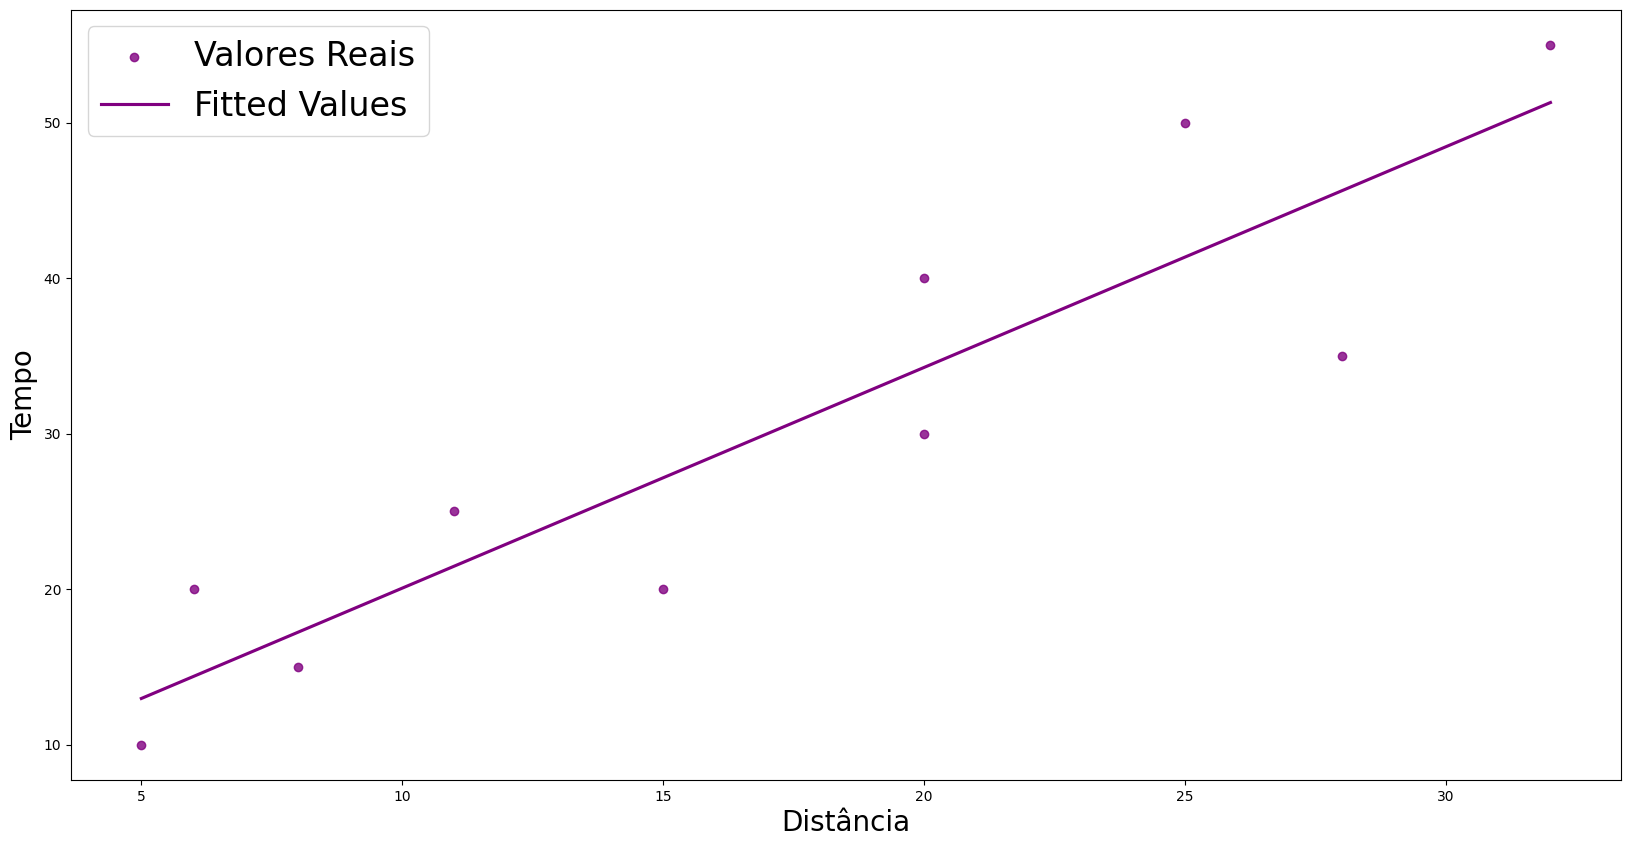

In [8]:
# In[ ]: Gráfico de dispersão

#Regressão linear que melhor se adequa às obeservações: função 'sns.regplot'

plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='tempo', ci=False, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [9]:
# In[ ]: Estimação do modelo de regressão linear simples

#Estimação do modelo
modelo = sm.OLS.from_formula("tempo ~ distancia", df).fit()

#Observação dos parâmetros resultantes da estimação
modelo.summary()

C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           0.000314
Time:                        18:23:10   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# In[ ]: Salvando fitted values (variável yhat) 
# e residuals (variável erro) no dataset

df['yhat'] = modelo.fittedvalues
df['erro'] = modelo.resid
df

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


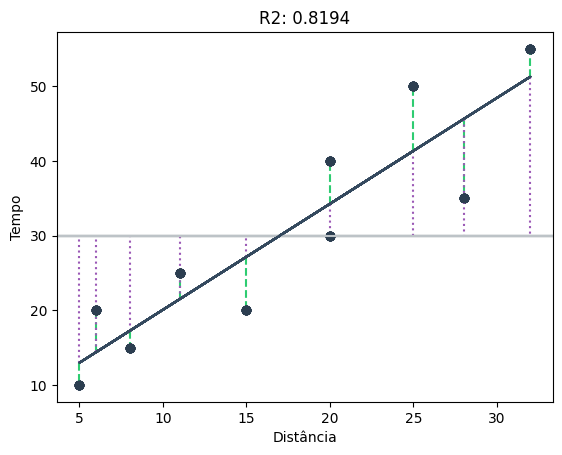

In [11]:
# In[ ]: Gráfico didático para visualizar o conceito de R²

y = df['tempo']
yhat = df['yhat']
x = df['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Distância")
    plt.ylabel("Tempo")
plt.show()

In [12]:
# In[ ]: Cálculo manual do R²

R2 = ((df['yhat']-
       df['tempo'].mean())**2).sum()/(((df['yhat']-
                                        df['tempo'].mean())**2).sum()+
                                        (df['erro']**2).sum())

round(R2,4)

0.8194

In [13]:
# In[ ]: Coeficiente de ajuste (R²) é a correlação ao quadrado

#Correlação de Pearson
df[['tempo','distancia']].corr()

#R²
(df[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


In [14]:
# In[ ]: Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos)

#Estimação do modelo com yhat como variável dependente,
#resultará em uma modelo com R² igual a 100%
modelo_auxiliar = sm.OLS.from_formula("yhat ~ distancia", df).fit()

#Parâmetros resultantes da estimação
modelo_auxiliar.summary()

C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          1.72e-122
Time:                        18:24:38   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.000       5.878       5.878
distancia      1.4189   3.55e-16      4e+15      0.000       1.419       1.419
==============================================================================
Omnibus:                       13.263   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                1.667
Skew:                           0.000   Prob(JB):                        0.435
Kurtosis:                       1.000   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

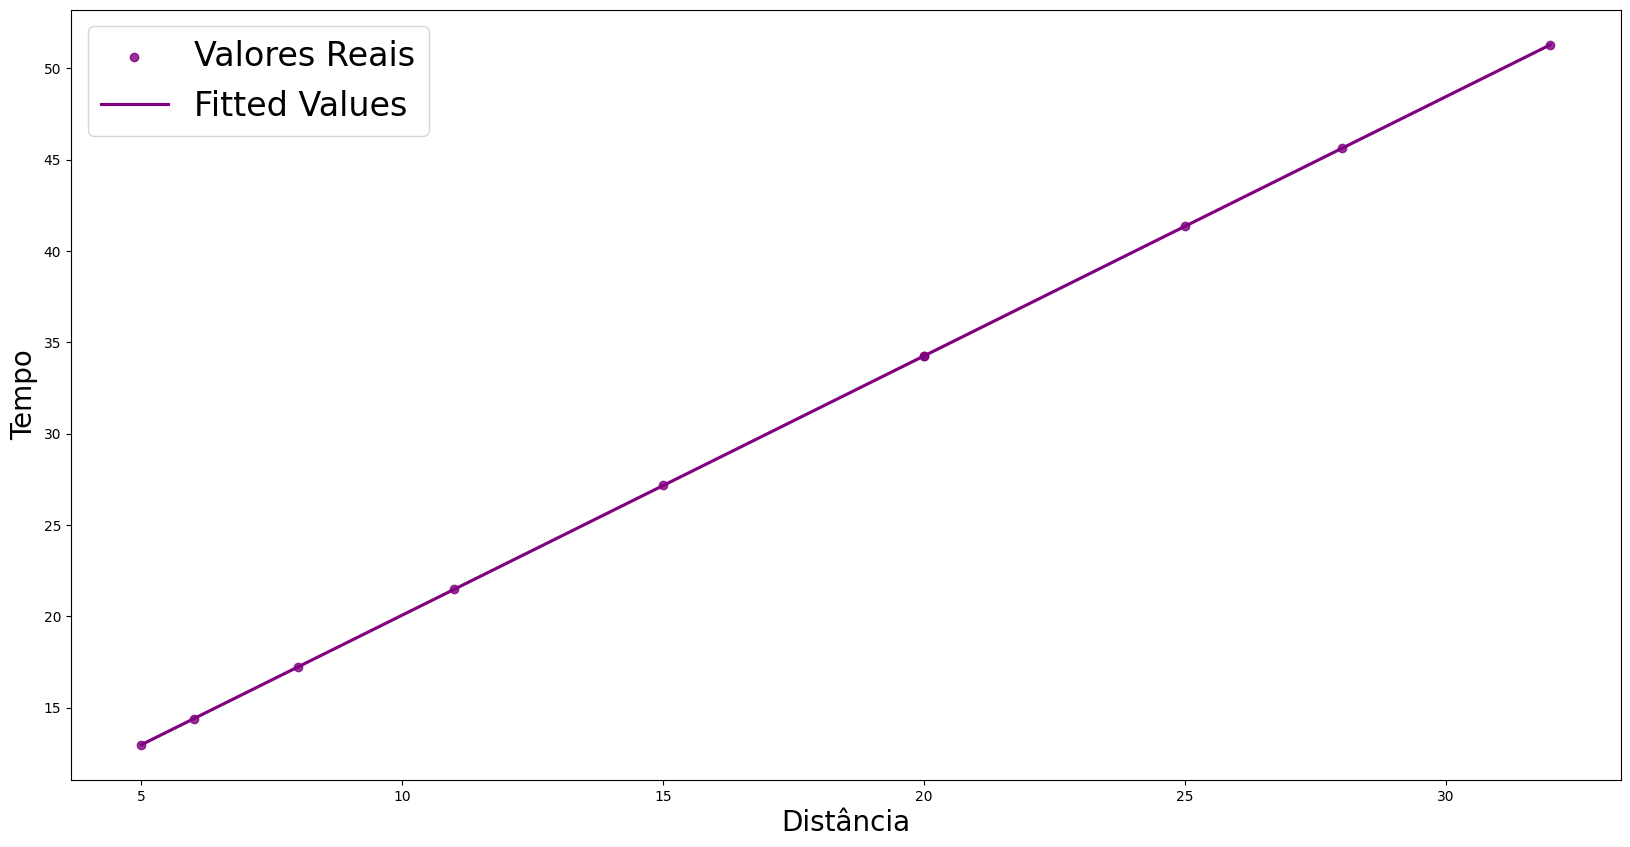

In [15]:
# In[ ]:Gráfico mostrando o perfect fit

plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='yhat', ci=False, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

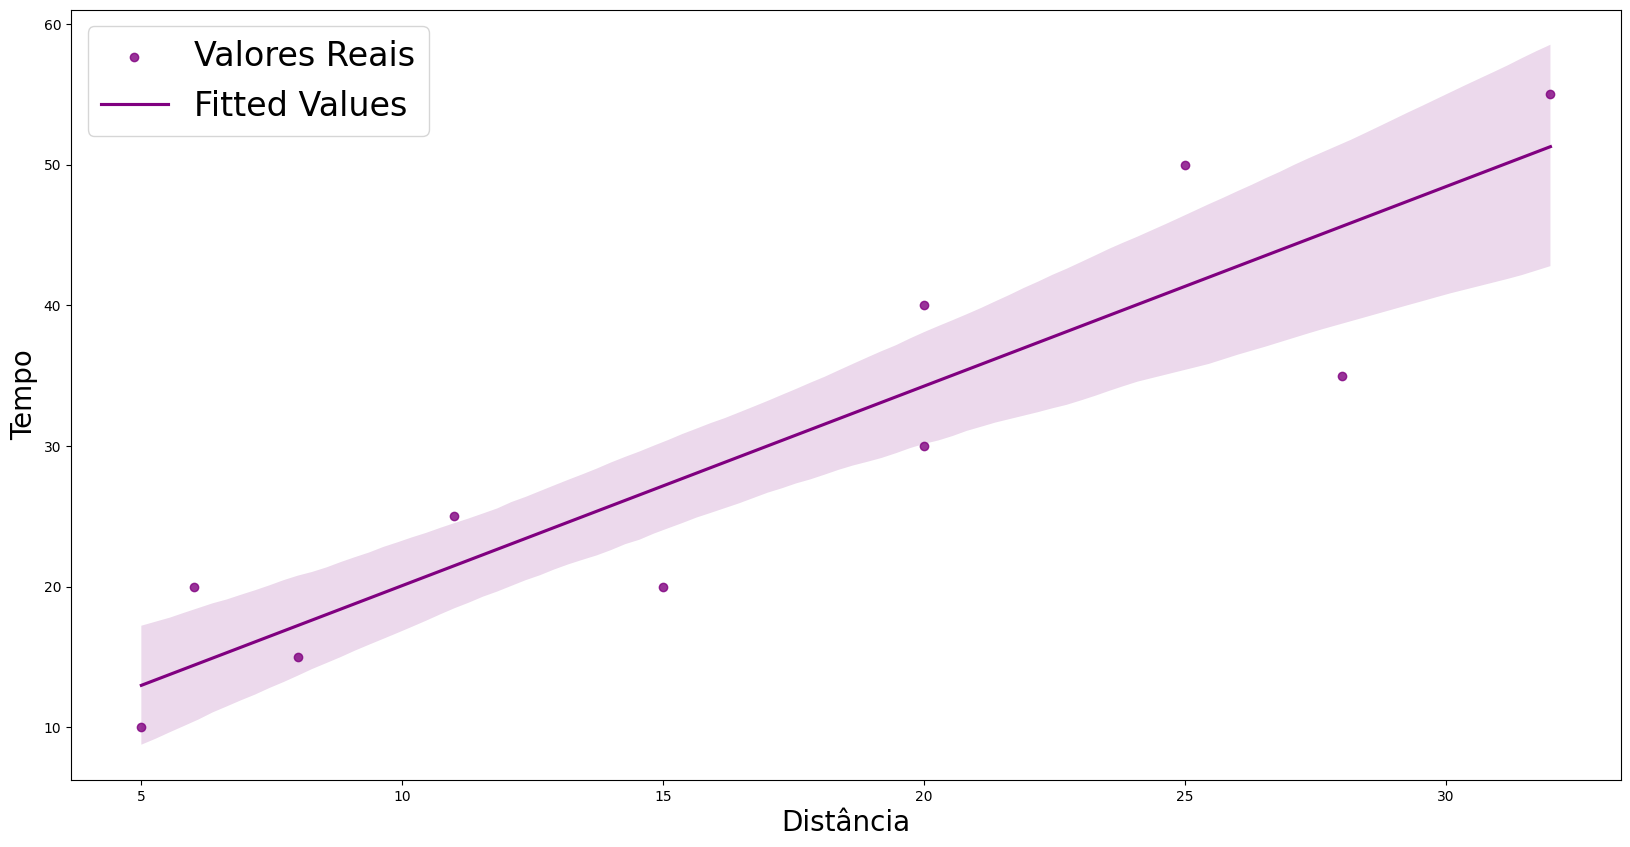

In [16]:
# In[ ]: Voltando ao nosso modelo original

#Plotando o intervalo de confiança de 90%
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='tempo', ci=90, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

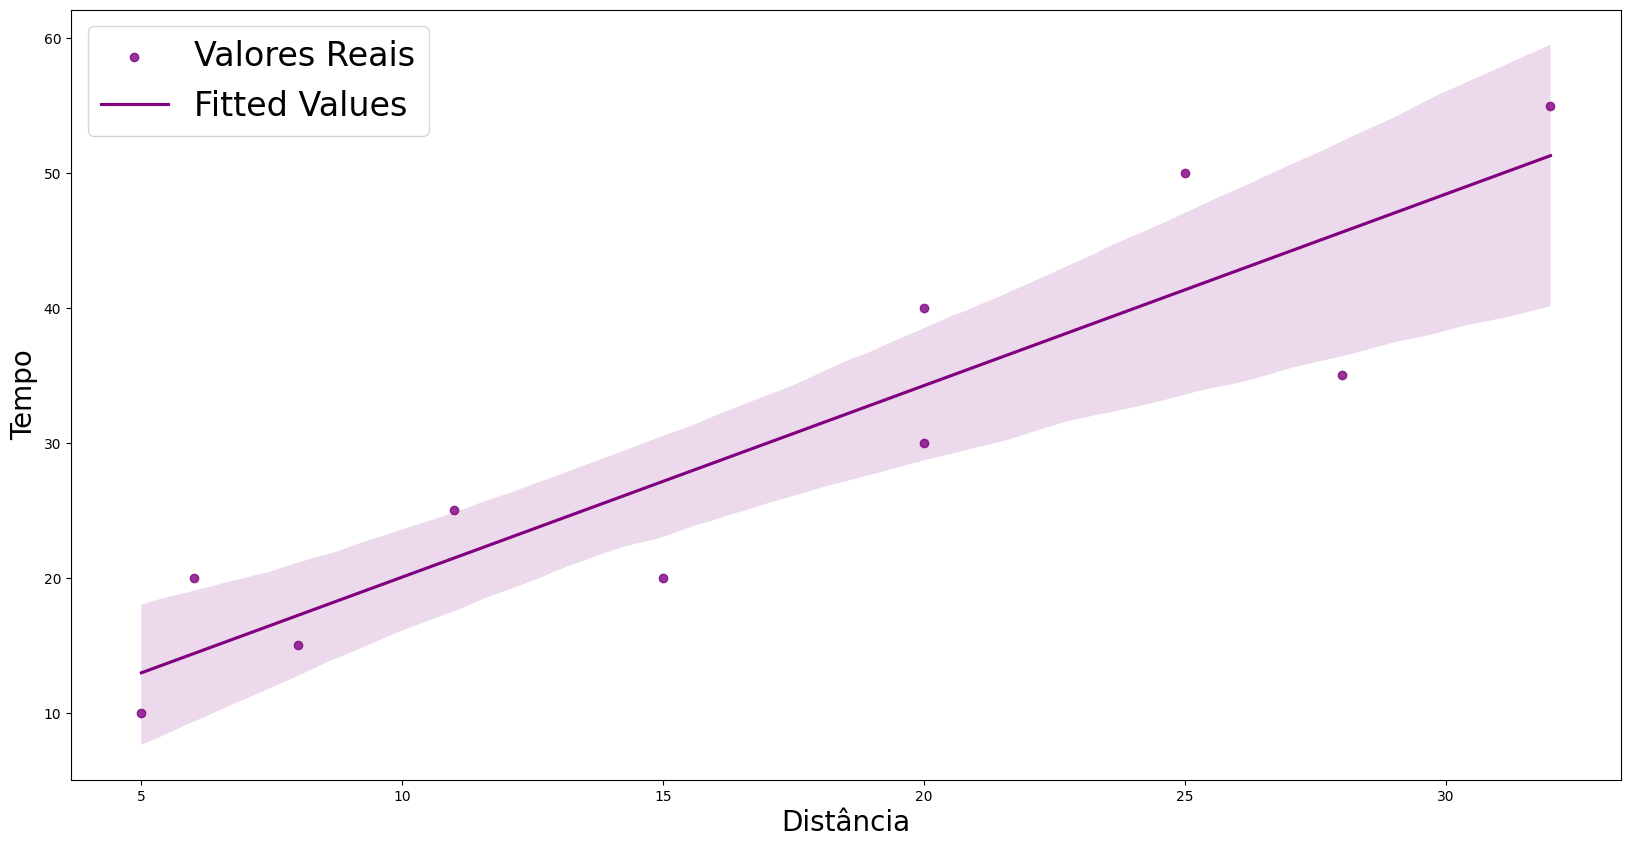

In [17]:
#Plotando o intervalo de confiança de 95%
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='tempo', ci=95, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

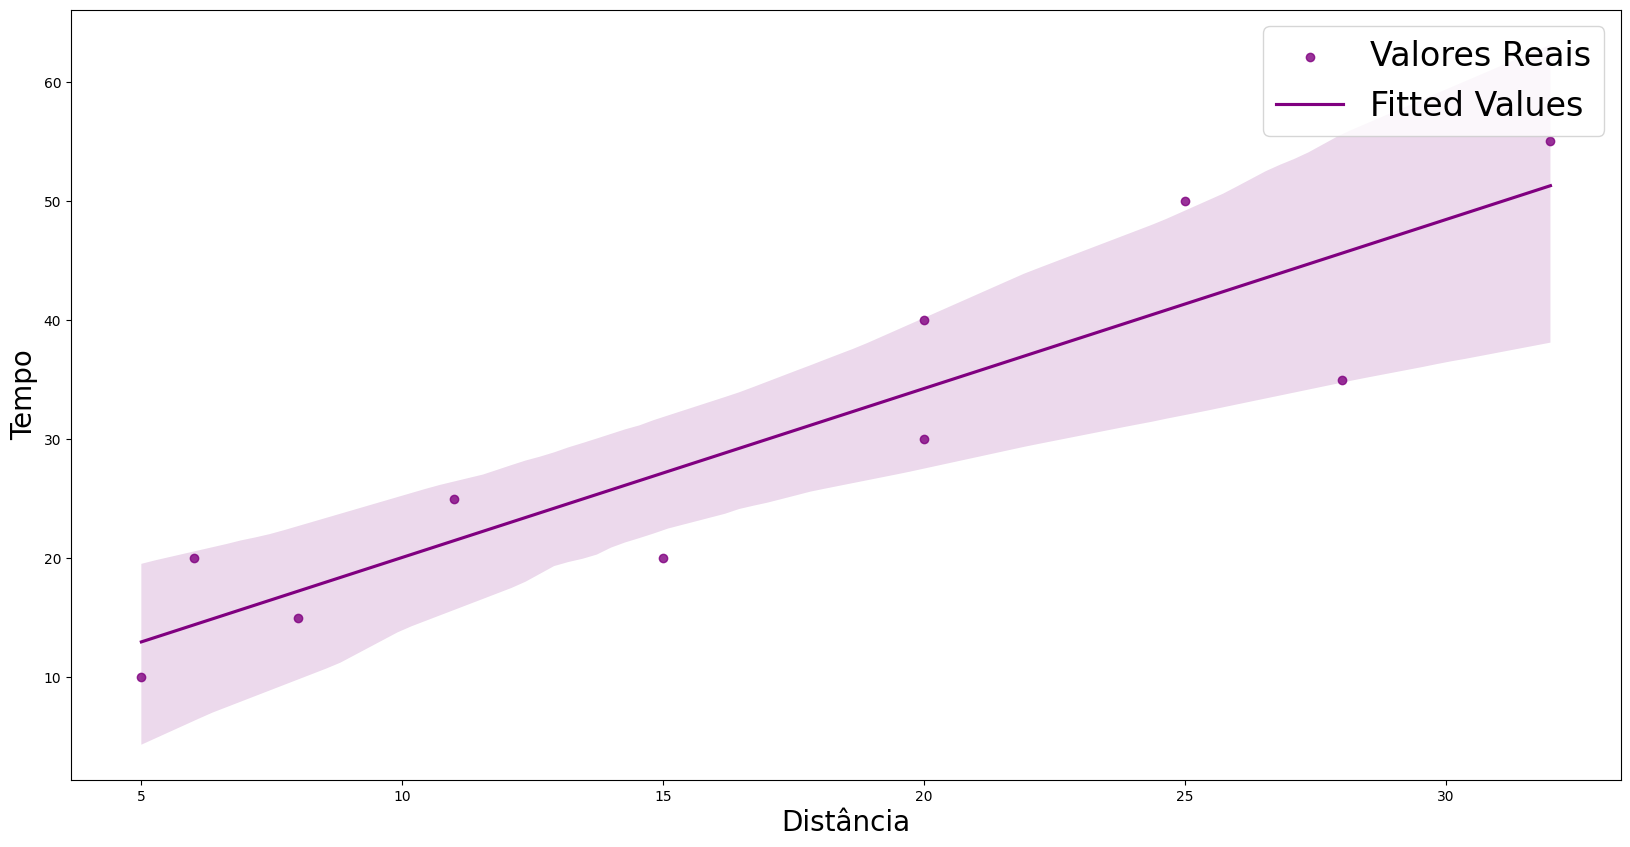

In [18]:
#Plotando o intervalo de confiança de 99%
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='tempo', ci=99, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

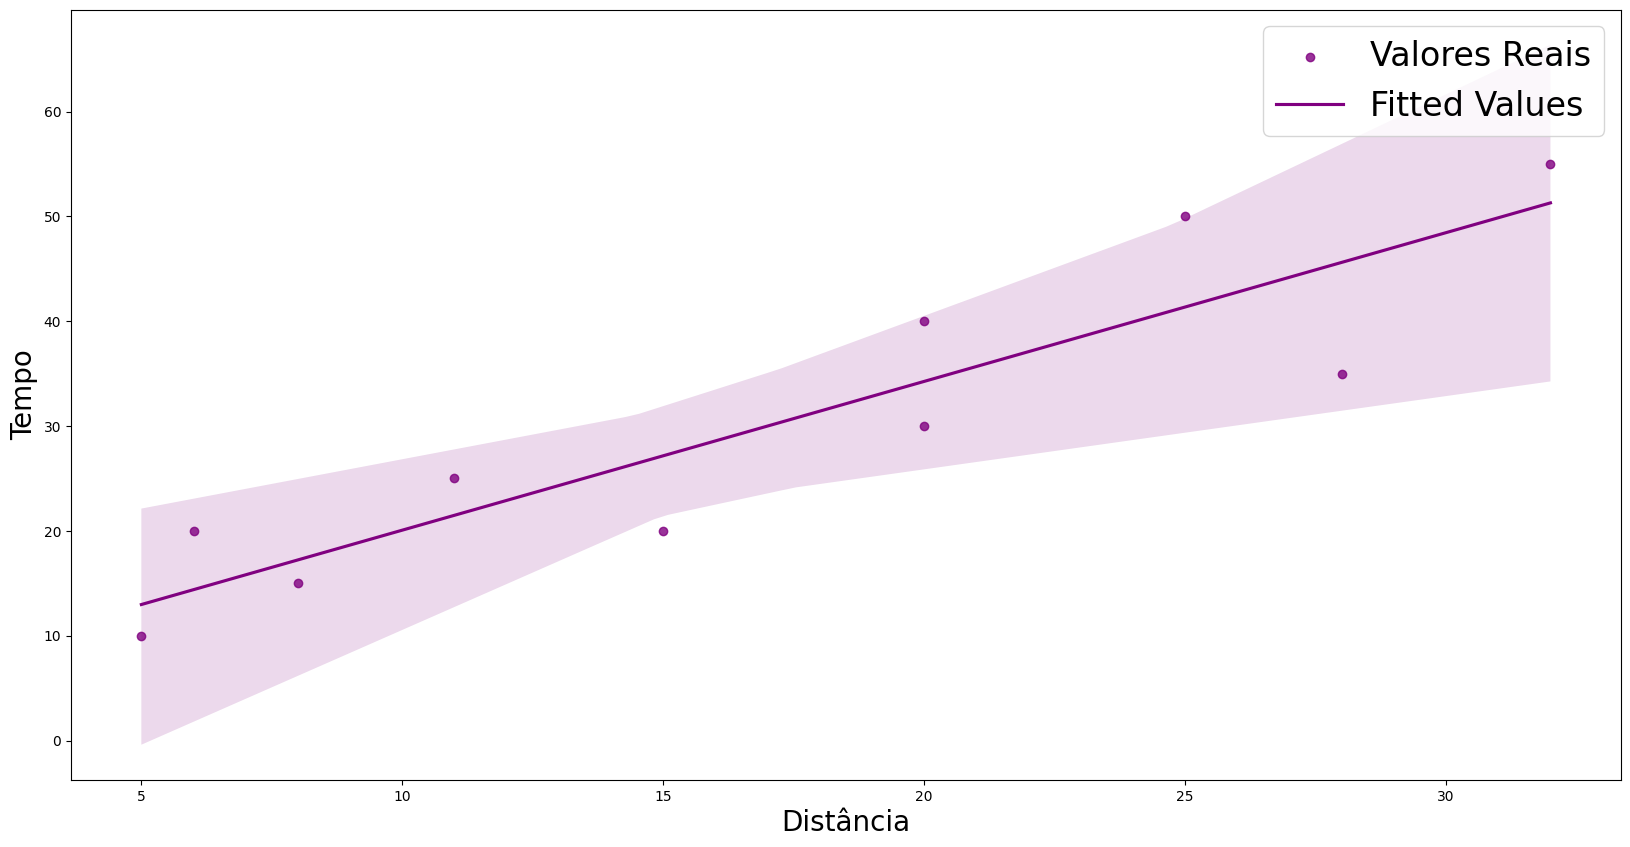

In [19]:
#Plotando o intervalo de confiança de 99,999%
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='tempo', ci=99.999, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [20]:
# In[ ]: Calculando os intervalos de confiança

#Nível de significância de 10% / Nível de confiança de 90%
modelo.conf_int(alpha=0.1)

#Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

#Nível de significância de 1% / Nível de confiança de 99%
modelo.conf_int(alpha=0.01)

#Nível de significância de 0,001% / Nível de confiança de 99,999%
modelo.conf_int(alpha=0.00001)

,0,1
Intercept,-38.45926,50.216017
distancia,-0.88484,3.722678


In [21]:
# In[ ]: Fazendo predições em modelos OLS
#Ex.: Qual seria o tempo gasto, em média, para percorrer a distância de 25km?

modelo.predict(pd.DataFrame({'distancia':[25]}))

#Cálculo manual - mesmo valor encontrado
5.8784 + 1.4189*(25)

41.3509

In [22]:
# In[ ]: Nova modelagem para o mesmo exemplo, com novo dataset que
#contém replicações

#Quantas replicações de cada linha você quer? -> função 'np.repeat'
df_replicado = pd.DataFrame(np.repeat(df.values, 3, axis=0))
df_replicado.columns = df.columns
df_replicado

,tempo,distancia,yhat,erro
0,15.0,8.0,17.229730,-2.229730
1,15.0,8.0,17.229730,-2.229730
2,15.0,8.0,17.229730,-2.229730
3,20.0,6.0,14.391892,5.608108
4,20.0,6.0,14.391892,5.608108
5,20.0,6.0,14.391892,5.608108
6,20.0,15.0,27.162162,-7.162162
7,20.0,15.0,27.162162,-7.162162
8,20.0,15.0,27.162162,-7.162162
9,40.0,20.0,34.256757,5.743243


In [23]:
# In[ ]: Estimação do modelo com valores replicados

modelo_replicado = sm.OLS.from_formula("tempo ~ distancia",
                                       df_replicado).fit()

#Parâmetros do modelo
modelo_replicado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           6.42e-12
Time:                        18:26:09   Log-Likelihood:                -96.369
No. Observations:                  30   AIC:                             196.7
Df Residuals:                      28   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      2.423      2.426      0.022       0.916      10.841
distancia      1.4189      0.126     11.272      0.000       1.161       1.677
==============================================================================
Omnibus:                        5.437   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.082
Skew:                          -0.262   Prob(JB):                        0.353
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# In[ ]: Calculando os novos intervalos de confiança

#Nível de significância de 5% / Nível de confiança de 95%
modelo_replicado.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distancia,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

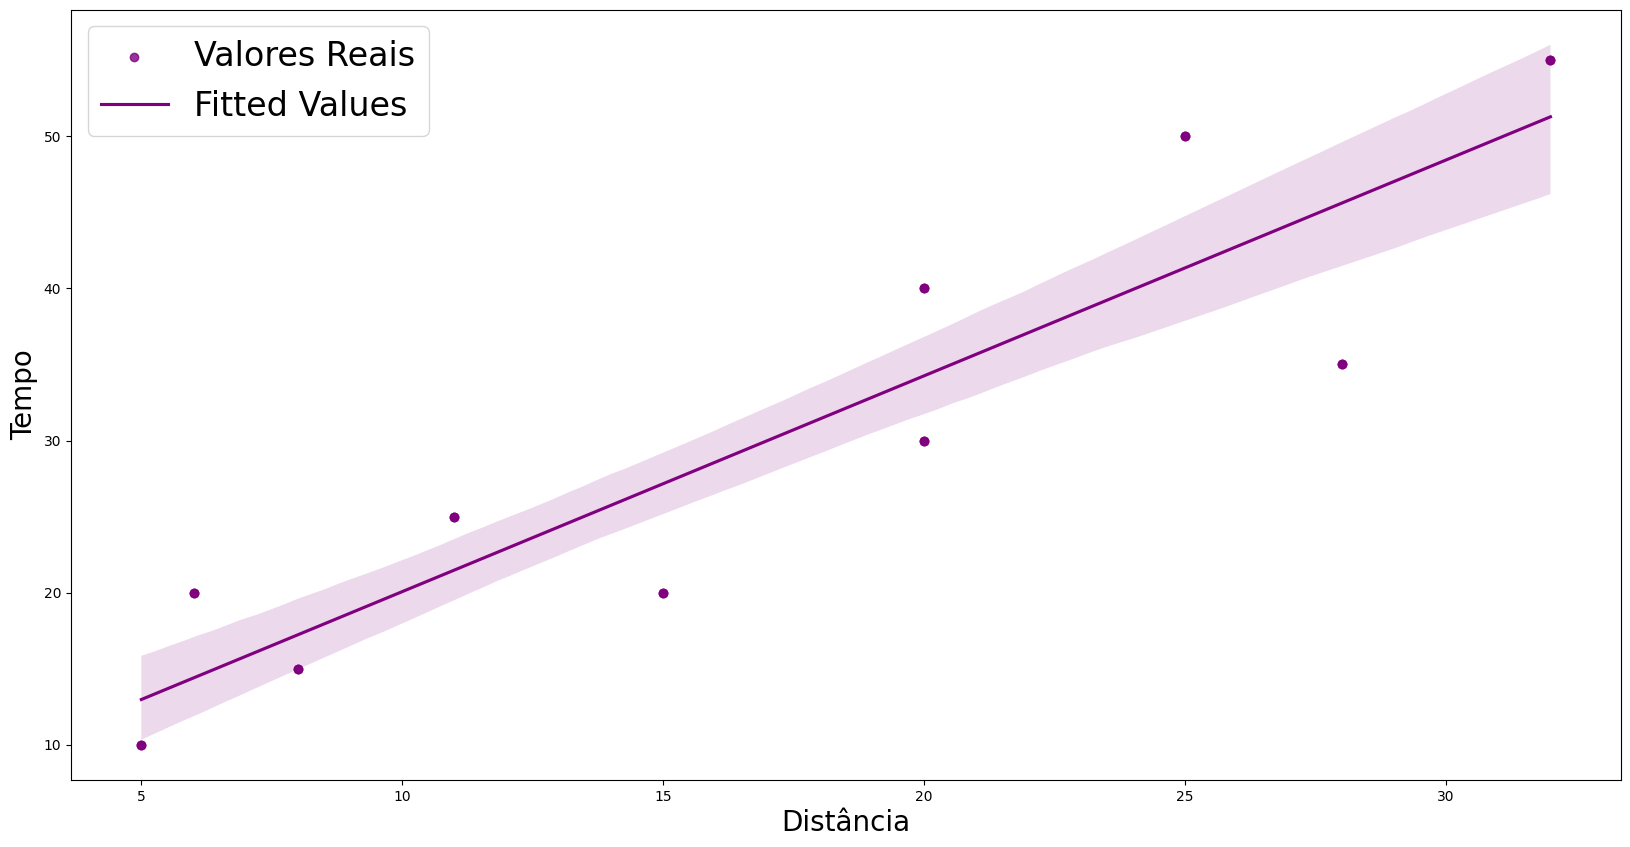

In [25]:
# In[ ]: Plotando o novo gráfico com intervalo de confiança de 95%
#Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(20,10))
sns.regplot(data=df_replicado, x='distancia', y='tempo', ci=95, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [26]:
# In[ ]: PROCEDIMENTO ERRADO: ELIMINAR O INTERCEPTO QUANDO ESTE NÃO SE MOSTRAR
#ESTATISTICAMENTE SIGNIFICANTE

modelo_errado = sm.OLS.from_formula("tempo ~ 0 + distancia", df).fit()

#Parâmetros do modelo
modelo_errado.summary()

C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  tempo   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              217.5
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    1.31e-07
Time:                        18:26:43   Log-Likelihood:                         -33.077
No. Observations:                  10   AIC:                                      68.15
Df Residuals:                       9   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distancia      1.6887      0.115     14.748      0.000       1.430       1.948
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.783
Skew:                          -0.647   Prob(JB):                        0.676
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# In[ ]: Comparando os parâmetros do modelo inicial (objeto 'modelo')
#com o 'modelo_errado'

summary_col([modelo, modelo_errado])

#Outro modo mais completo também pela função 'summary_col'
summary_col([modelo, modelo_errado],
            model_names=["MODELO INICIAL","MODELO ERRADO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,MODELO INICIAL,MODELO ERRADO
Intercept,5.8784,
,(4.5323),
R-squared,0.8194,0.9603
R-squared Adj.,0.7969,0.9558
distancia,1.4189***,1.6887***
,(0.2355),(0.1145)
N,10,10


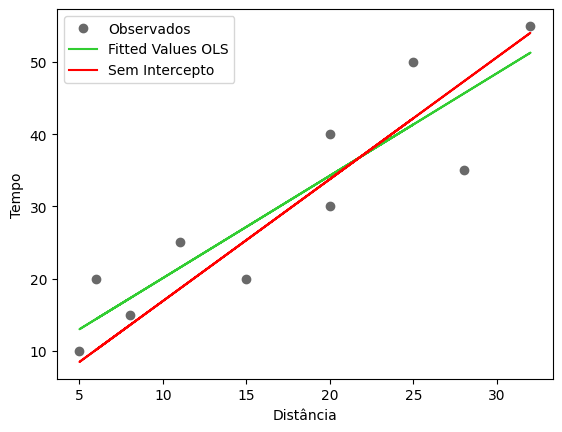

In [28]:
# In[ ]: Gráfico didático para visualizar o viés decorrente de se eliminar
# erroneamente o intercepto em modelos regressivos

x = df['distancia']
y = df['tempo']

yhat = df['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='dimgray')
plt.plot(x, yhat, color='limegreen')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.legend(['Observados','Fitted Values OLS','Sem Intercepto'])
plt.show()

In [29]:
# In[ ]: Inserção de figuras no gráfico -> comandar Shift + Enter

from matplotlib.offsetbox import AnnotationBbox, OffsetImage

f = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRw3cY0sCZKUu7KGTNpf5NMURoLdy1UHpxS-w&usqp=CAU"
bom = io.imread(f)

f = "https://icon-library.com/images/error-image-icon/error-image-icon-23.jpg"
ruim = io.imread(f)

fig, ax = plt.subplots()

x = df['distancia']
y = df['tempo']

yhat = df['yhat']
yhat_errado = modelo_errado.fittedvalues

img_box = OffsetImage(ruim, zoom=0.05)
xy=[25,20]

img_bom = AnnotationBbox(img_box, xy, xybox=(10,-10), boxcoords='offset points')

img_box = OffsetImage(bom, zoom=0.15)
xy=[10,40]

img_ruim = AnnotationBbox(img_box, xy, xybox=(10,-10), boxcoords='offset points')

ax.set_xlabel("Distância")
ax.set_ylabel("Tempo")

ax.plot(x, y, 'o', color='dimgray')
ax.plot(x, yhat, color='limegreen')
ax.plot(x, yhat_errado, color='red')

ax.legend(['Observado','Fitted values OLS', 'Sem Intercepto'])
ax.add_artist(img_bom)
ax.add_artist(img_ruim)
plt.show()

URLError: <urlopen error [SSL: WRONG_SIGNATURE_TYPE] wrong signature type (_ssl.c:992)>

In [30]:
# In[ ]:
#############################################################################
#                         REGRESSÃO LINEAR MÚLTIPLA                         #
#                EXEMPLO 02 - CARREGAMENTO DA BASE DE DADOS                 #
#############################################################################

df_paises = pd.read_csv('paises.csv', delimiter=',', encoding="utf-8")
df_paises

#Características das variáveis do dataset
df_paises.info()

#Estatísticas univariadas
df_paises.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


In [31]:
# In[ ]: Gráfico 3D com scatter

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))
plot_figure.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\2721053194.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\2721053194.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



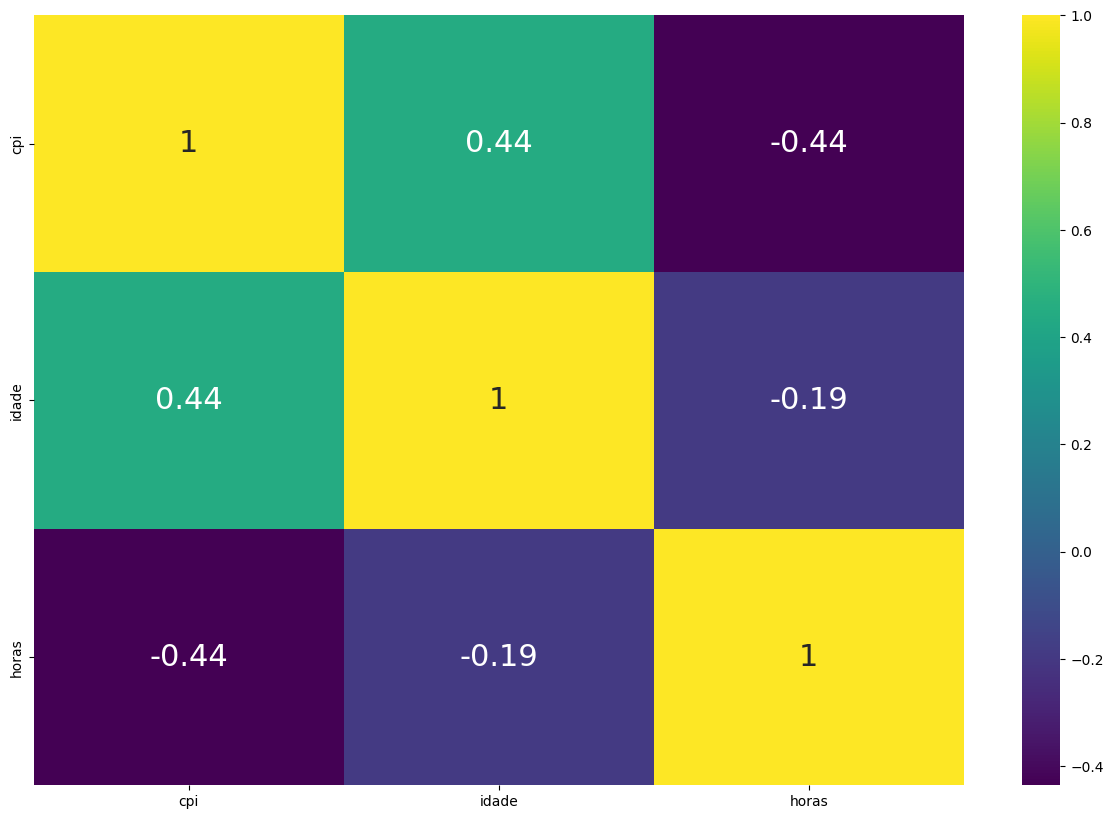

In [32]:
# In[ ]: Matriz de correlações

corr = df_paises.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_paises.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

<Figure size 1500x1000 with 0 Axes>

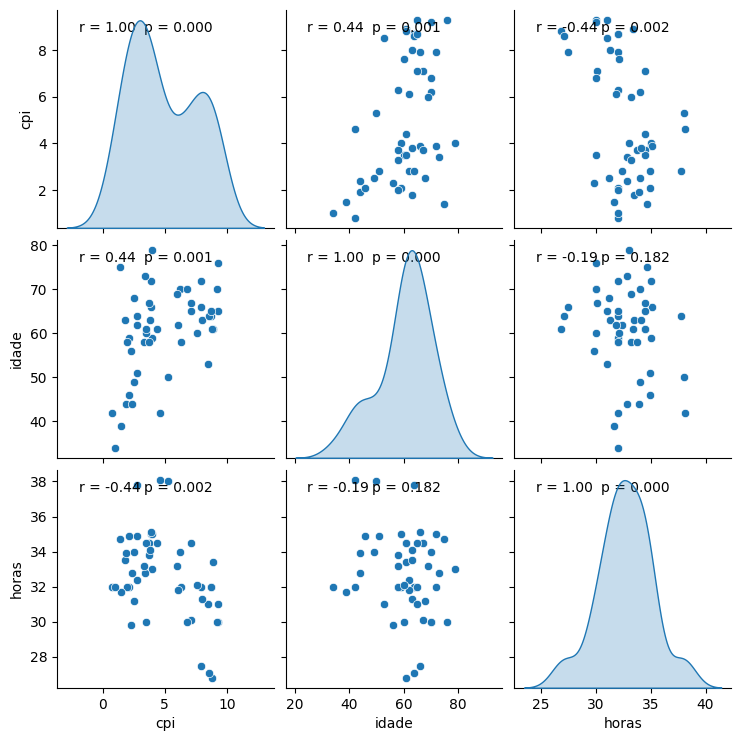

In [33]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_paises, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [34]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_paises = sm.OLS.from_formula("cpi ~ idade + horas", df_paises).fit()

#Parâmetros do modelo
modelo_paises.summary()

#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_paises.conf_int(alpha=0.05)


,0,1
Intercept,1.580527,22.363308
idade,0.033986,0.165410
horas,-0.672256,-0.130418


In [35]:
# In[ ]: Salvando os fitted values na base de dados

df_paises['cpifit'] = modelo_paises.fittedvalues
df_paises

,pais,cpi,idade,horas,cpifit
0,Argentina,3.9,72,35.000000,5.103394
1,Australia,8.7,64,32.000000,5.509820
2,Austria,7.9,72,32.000000,6.307404
3,Belgium,7.1,67,30.100000,6.571454
4,Brazil,4.0,59,35.000000,3.807319
5,Canada,8.9,61,33.400002,4.648853
6,Chile,6.2,70,34.000000,5.305335
7,China,2.5,49,34.000000,3.211674
8,Colombia,4.0,79,33.000000,6.603954
9,Cyprus,6.3,58,32.000000,4.911631


In [36]:
# In[ ]: Gráfico 3D com scatter e fitted values resultantes do modelo

trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    xaxis_title='X AXIS TITLE',
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_paises['horas'], 
                    y=df_paises['idade'], 
                    z=df_paises['cpifit'], 
                    opacity=0.5,
                    color='pink'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))
plot_figure.show()

In [37]:
# In[ ]:
#############################################################################
#         REGRESSÃO COM UMA VARIÁVEL EXPLICATIVA (X) QUALITATIVA            #
#             EXEMPLO 03 - CARREGAMENTO DA BASE DE DADOS                    #
#############################################################################

df_corrupcao = pd.read_csv('corrupcao.csv',delimiter=',',encoding='utf-8')
df_corrupcao

#Características das variáveis do dataset
df_corrupcao.info()

#Estatísticas univariadas
df_corrupcao.describe()

# Estatísticas univariadas por região
df_corrupcao.groupby('regiao').describe()

#Tabela de frequências da variável 'regiao'
#Função 'value_counts' do pacote 'pandas' sem e com o argumento 'normalize'
#para gerar, respectivamente, as contagens e os percentuais
contagem = df_corrupcao['regiao'].value_counts(dropna=False)
percent = df_corrupcao['regiao'].value_counts(dropna=False, normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   regiao  50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


,contagem,%
Europa,24,0.48
Asia,17,0.34
America_do_sul,5,0.10
Oceania,2,0.04
EUA_e_Canada,2,0.04


In [38]:
# In[ ]: Conversão dos dados de 'regiao' para dados numéricos, a fim de
#se mostrar a estimação de modelo com o problema da ponderação arbitrária

label_encoder = LabelEncoder()
df_corrupcao['regiao_numerico'] = label_encoder.fit_transform(df_corrupcao['regiao'])
df_corrupcao['regiao_numerico'] = df_corrupcao['regiao_numerico'] + 1
df_corrupcao.head(10)

#A nova variável 'regiao_numerico' é quantitativa (ERRO!), fato que
#caracteriza a ponderação arbitrária!
df_corrupcao['regiao_numerico'].info()
df_corrupcao.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: regiao_numerico
Non-Null Count  Dtype
--------------  -----
50 non-null     int32
dtypes: int32(1)
memory usage: 328.0 bytes


,cpi,regiao_numerico
count,50.000000,50.000000
mean,4.894000,3.020000
std,2.678974,1.186489
min,0.800000,1.000000
25%,2.575000,2.000000
50%,3.950000,4.000000
75%,7.475000,4.000000
max,9.300000,5.000000


In [39]:
# In[ ]: Modelando com a variável preditora numérica, resultando na
#estimação ERRADA dos parâmetros
#PONDERAÇÃO ARBITRÁRIA!
modelo_corrupcao_errado = sm.OLS.from_formula("cpi ~ regiao_numerico",
                                              df_corrupcao).fit()

#Parâmetros do modelo
modelo_corrupcao_errado.summary()

#Calculando os intervalos de confiança com nível de significância de 5%
modelo_corrupcao_errado.conf_int(alpha=0.05)

,0,1
Intercept,-1.108888,2.148957
regiao_numerico,0.945636,1.951029


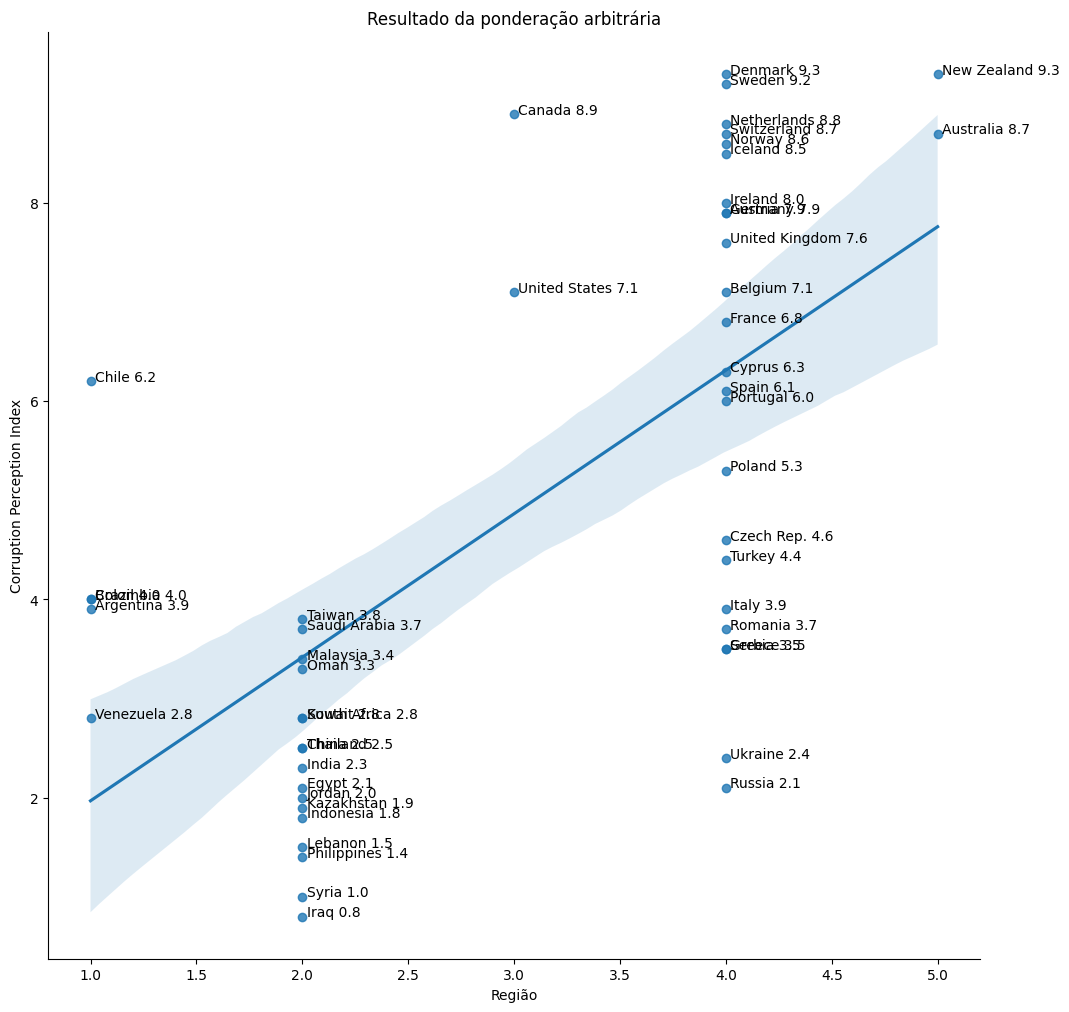

In [40]:
# In[ ]: Plotando os fitted values do modelo_corrupcao_errado considerando,
#PROPOSITALMENTE, a ponderação arbitrária, ou seja, assumindo que as regiões
#representam valores numéricos (América do Sul = 1; Ásia = 2; EUA e Canadá = 3;
#Europa = 4; Oceania = 5).

ax =sns.lmplot(
    data=df_corrupcao,
    x="regiao_numerico", y="cpi",
    height=10
)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']) + " " +
                str(point['y']))
plt.title('Resultado da ponderação arbitrária')
plt.xlabel('Região')
plt.ylabel('Corruption Perception Index')
label_point(x = df_corrupcao['regiao_numerico'],
            y = df_corrupcao['cpi'],
            val = df_corrupcao['pais'],
            ax = plt.gca()) 

In [41]:
# In[ ]: Dummizando a variável 'regiao'. O código abaixo automaticamente fará: 
# a)o estabelecimento de dummies que representarão cada uma das regiões do dataset; 
# b)removerá a variável original a partir da qual houve a dummização; 
# c)estabelecerá como categoria de referência a primeira categoria, ou seja,
# a categoria 'America_do_sul' por meio do argumento 'drop_first=True'.

df_corrupcao_dummies = pd.get_dummies(df_corrupcao, columns=['regiao'],
                                      drop_first=True)

df_corrupcao_dummies.head(10)

#A variável 'regiao' está inicialmente definida como 'object' no dataset
df_corrupcao.info()
#O procedimento atual também poderia ter sido realizado em uma variável
#dos tipos 'category' ou 'string'. Para fins de exemplo, podemos transformar a
#variável 'regiao' para 'category' ou 'string' e comandar o código anterior:
df_corrupcao['regiao'] = df_corrupcao['regiao'].astype("category")
df_corrupcao.info()
df_corrupcao['regiao'] = df_corrupcao['regiao'].astype("string")
df_corrupcao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             50 non-null     object 
 1   cpi              50 non-null     float64
 2   regiao           50 non-null     object 
 3   regiao_numerico  50 non-null     int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pais             50 non-null     object  
 1   cpi              50 non-null     float64 
 2   regiao           50 non-null     category
 3   regiao_numerico  50 non-null     int32   
dtypes: category(1), float64(1), int32(1), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):

In [42]:
# In[ ]: Estimação do modelo de regressão múltipla com n-1 dummies

modelo_corrupcao_dummies = sm.OLS.from_formula("cpi ~ regiao_Asia + \
                                              regiao_EUA_e_Canada + \
                                              regiao_Europa + \
                                              regiao_Oceania",
                                              df_corrupcao_dummies).fit()

#Parâmetros do modelo
modelo_corrupcao_dummies.summary()

#Outro método (sugestão de uso para muitas dummies no dataset)
# Definição da fórmula utilizada no modelo
lista_colunas = list(df_corrupcao_dummies.drop(columns=['cpi','pais','regiao_numerico']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "cpi ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

modelo_corrupcao_dummies = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_corrupcao_dummies).fit()

#Parâmetros do modelo
modelo_corrupcao_dummies.summary()

Fórmula utilizada:  cpi ~ regiao_Asia + regiao_EUA_e_Canada + regiao_Europa + regiao_Oceania


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.37e-08
Time:                        18:33:50   Log-Likelihood:                -96.620
No. Observations:                  50   AIC:                             203.2
Df Residuals:                      45   BIC:                             212.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1800      0.788      5.306      0.000       2.593       5.767
regiao_Asia            -1.8506      0.896     -2.065      0.045      -3.655      -0.046
regiao_EUA_e_Canada     3.8200      1.474      2.592      0.013       0.852       6.788
regiao_Europa           2.0783      0.866      2.400      0.021       0.334       3.822
regiao_Oceania          4.8200      1.474      3.271      0.002       1.852       7.788
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.083
Skew:                          -0.347   Prob(JB):                        0.582
Kurtosis:                       2.804   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

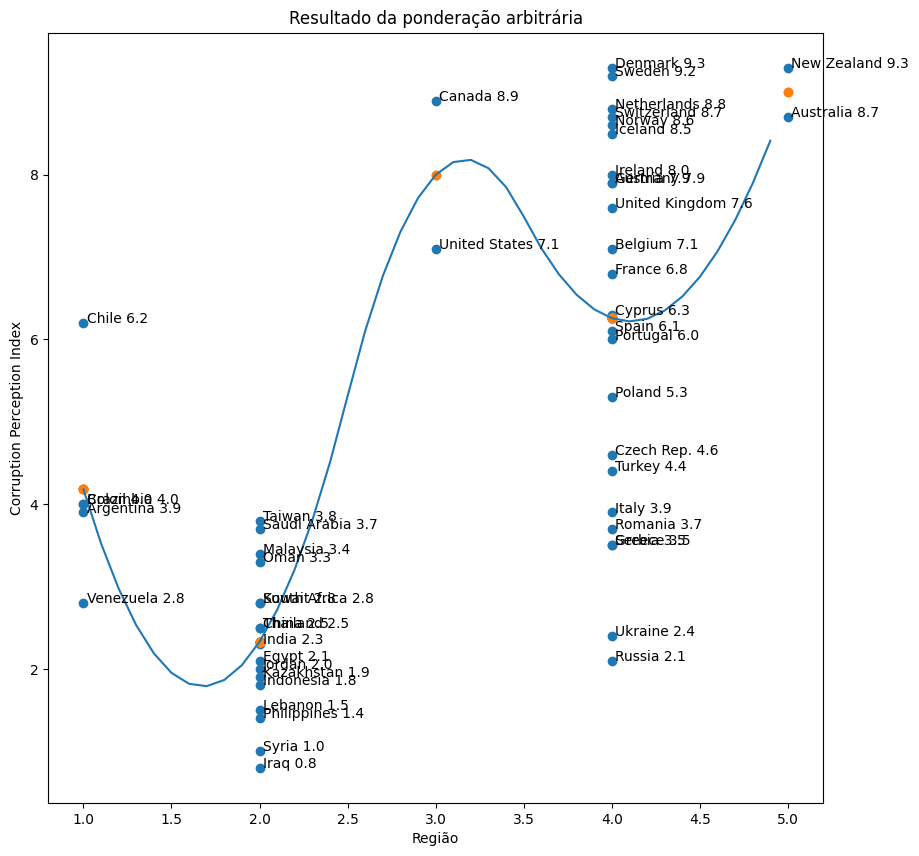

In [43]:
# In[ ]: Plotando o modelo_corrupcao_dummies de forma interpolada

#Fitted values do 'modelo_corrupcao_dummies' no dataset 'df_corrupcao_dummies'
df_corrupcao_dummies['fitted'] = modelo_corrupcao_dummies.fittedvalues
df_corrupcao_dummies.head()

#Gráfico
from scipy import interpolate

plt.figure(figsize=(10,10))

df2 = df_corrupcao_dummies[['regiao_numerico','fitted']].groupby(['regiao_numerico']).median().reset_index()
x = df2['regiao_numerico']
y = df2['fitted']

tck = interpolate.splrep(x, y, k=2)
xnew = np.arange(1,5,0.1) 
ynew = interpolate.splev(xnew, tck, der=0)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']) + " " + str(point['y']))

plt.scatter(df_corrupcao_dummies['regiao_numerico'], df_corrupcao_dummies['cpi'])
plt.scatter(df_corrupcao_dummies['regiao_numerico'], df_corrupcao_dummies['fitted'])
plt.plot(xnew, ynew)
plt.title('Resultado da ponderação arbitrária')
plt.xlabel('Região')
plt.ylabel('Corruption Perception Index')
label_point(x = df_corrupcao['regiao_numerico'],
            y = df_corrupcao['cpi'],
            val = df_corrupcao['pais'],
            ax = plt.gca())

In [44]:
# In[ ]:
#############################################################################
#            REGRESSÃO NÃO LINEAR E TRANSFORMAÇÃO DE BOX-COX                #
#              EXEMPLO 04 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################

df_bebes = pd.read_csv('bebes.csv', delimiter=',')
df_bebes

#Características das variáveis do dataset
df_bebes.info()

#Estatísticas univariadas
df_bebes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


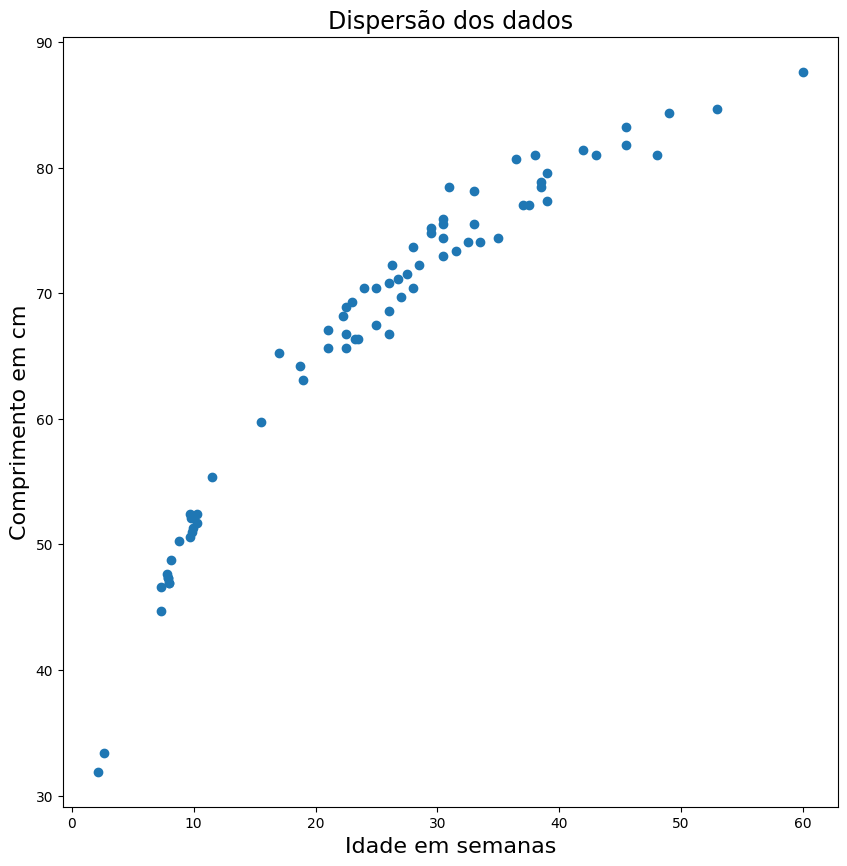

In [45]:
# In[ ]: Gráfico de dispersão

plt.figure(figsize=(10,10))
plt.scatter(df_bebes['idade'],df_bebes['comprimento'])
plt.title('Dispersão dos dados', fontsize=17)
plt.xlabel('Idade em semanas', fontsize=16)
plt.ylabel('Comprimento em cm', fontsize=16)
plt.show()

In [46]:
# In[ ]: Estimação de um modelo OLS linear
modelo_linear = sm.OLS.from_formula('comprimento ~ idade', df_bebes).fit()

#Observar os parâmetros resultantes da estimação
modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.72e-38
Time:                        18:34:44   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.000      41.038      45.163
idade          0.9411      0.036     25.841      0.000       0.868       1.014
==============================================================================
Omnibus:                       21.203   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.159
Skew:                          -1.218   Prob(JB):                     4.66e-07
Kurtosis:                       4.877   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

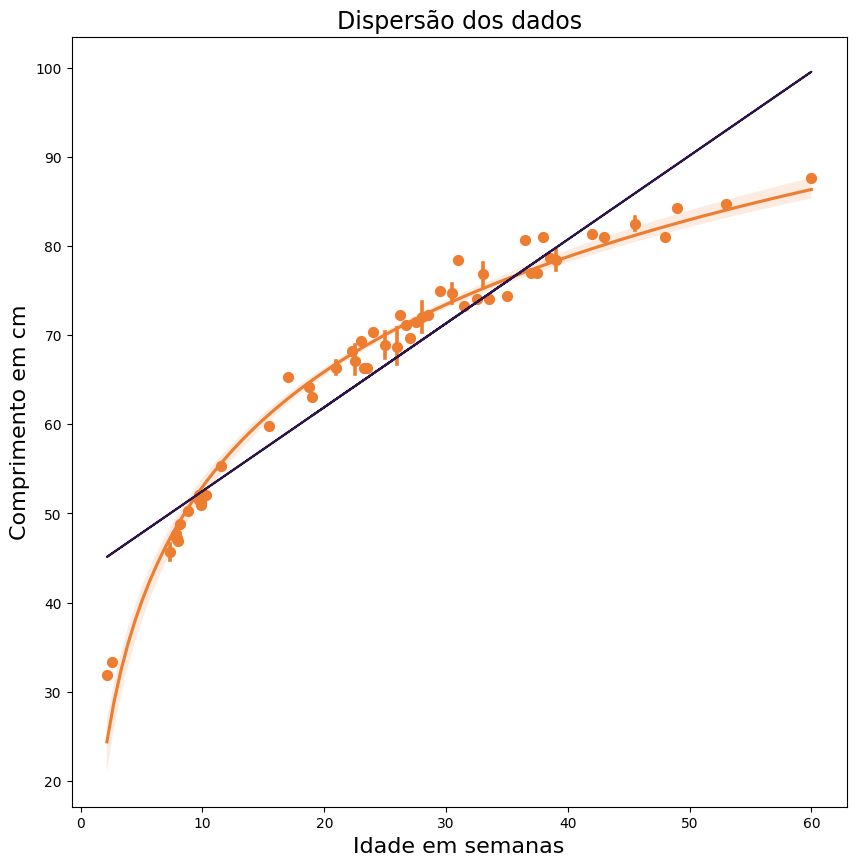

In [47]:
# In[ ]: Gráfico de dispersão com ajustes (fits) linear e não linear

plt.figure(figsize=(10,10))
sns.regplot(x="idade", y="comprimento", data=df_bebes,
            x_estimator=np.mean, logx=True, color='#ed7d31')
plt.plot(df_bebes['idade'],modelo_linear.fittedvalues, color='#2e1547')
plt.title('Dispersão dos dados', fontsize=17)
plt.xlabel('Idade em semanas', fontsize=16)
plt.ylabel('Comprimento em cm', fontsize=16)
plt.show()


In [50]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_linear.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9087044262594457,
 'statistics z': 3.6276504915453827,
 'p-value': 0.00014300603555437503}

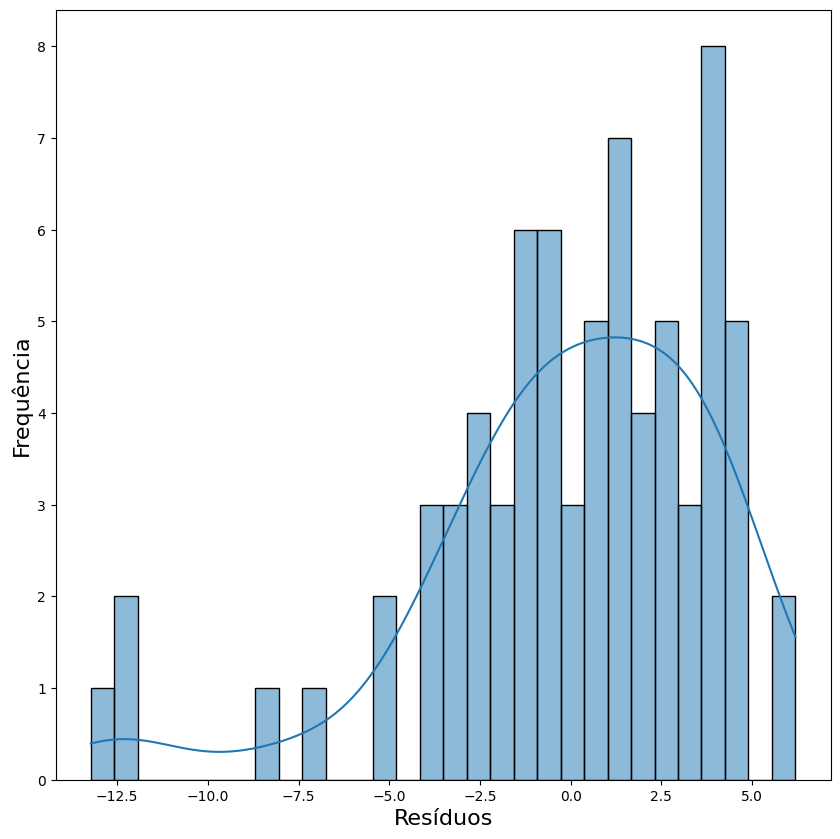

In [51]:
# In[ ]: Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_linear.resid, kde=True, bins=30)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

In [54]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df_bebes['comprimento'])

#Inserindo a variável transformada ('bc_comprimento') no dataset
#para a estimação de um novo modelo
df_bebes['bc_comprimento'] = x

df_bebes

#Apenas para fins de comparação e comprovação do cálculo de x
df_bebes['bc_comprimento2'] = ((df_bebes['comprimento']**lmbda)-1)/lmbda

df_bebes

del(df_bebes['bc_comprimento2'])

In [53]:
# In[ ]: Estimando um novo modelo OLS com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_comprimento ~ idade', df_bebes).fit()

#Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_comprimento   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           7.16e-53
Time:                        18:36:28   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1602    630.253      7.926      0.000    3738.774    6251.546
idade        947.2298     22.189     42.689      0.000     902.997     991.463
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.557
Skew:                           0.098   Prob(JB):                        0.757
Kurtosis:                       3.377   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# In[ ]: Comparando os parâmetros do 'modelo_linear' com os do 'modelo_bc'
#CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

summary_col([modelo_linear, modelo_bc])

#Outro modo mais completo também pela função 'summary_col'
summary_col([modelo_linear, modelo_bc],
            model_names=["MODELO LINEAR","MODELO BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

#Repare que há um salto na qualidade do ajuste para o modelo não linear (R²)

pd.DataFrame({'R² OLS':[round(modelo_linear.rsquared,4)],
              'R² Box-Cox':[round(modelo_bc.rsquared,4)]})

,R² OLS,R² Box-Cox
0,0.9027,0.962


In [56]:
# In[ ]: Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia
shapiroFrancia(modelo_bc.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9729952103345907,
 'statistics z': 1.2666151749155392,
 'p-value': 0.1026464618655501}

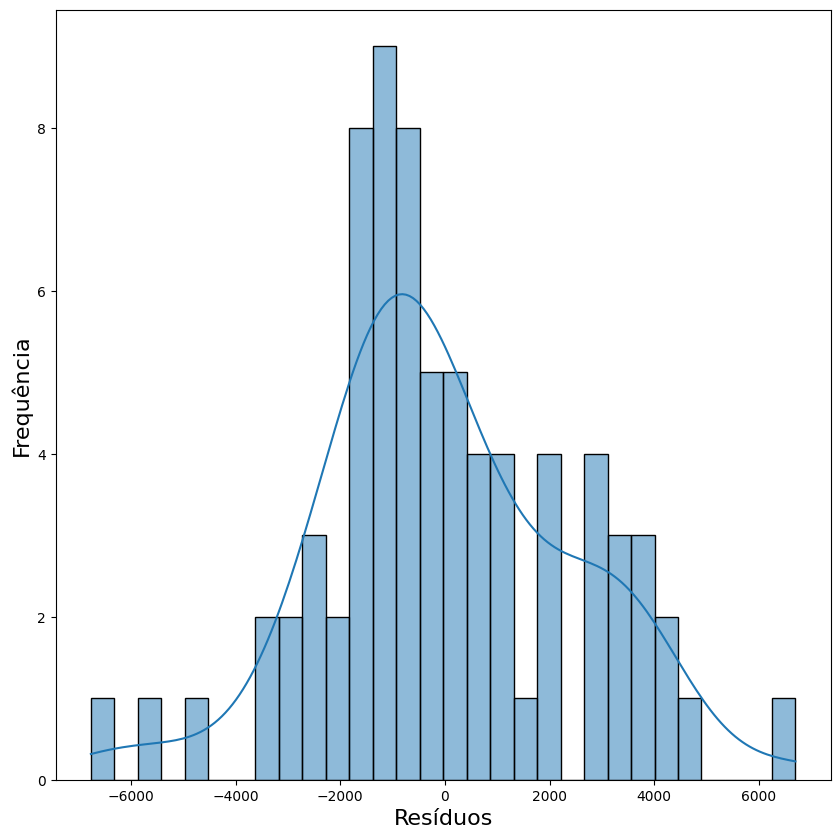

In [57]:
# In[ ]: Histograma dos resíduos do modelo_bc

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_bc.resid, kde=True, bins=30)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

In [58]:
# In[ ]: Fazendo predições com os modelos OLS linear e Box-Cox
#Qual é o comprimento esperado de um bebê com 52 semanas de vida?

#Modelo OLS Linear:
modelo_linear.predict(pd.DataFrame({'idade':[52]}))

#Modelo Não Linear (Box-Cox):
modelo_bc.predict(pd.DataFrame({'idade':[52]}))

#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted
#value de Y (variável 'comprimento')
(54251.109775 * lmbda + 1) ** (1 / lmbda)

87.14006473485827

In [59]:
# In[ ]: Salvando os fitted values dos dois modelos (modelo_linear e modelo_bc)
#no dataset 'bebes'

df_bebes['yhat_linear'] = modelo_linear.fittedvalues
df_bebes['yhat_modelo_bc'] = (modelo_bc.fittedvalues * lmbda + 1) ** (1 / lmbda)
df_bebes

,comprimento,idade,bc_comprimento,yhat_linear,yhat_modelo_bc
0,63.07,19.00,22966.083193,60.981260,63.097300
1,65.63,21.00,25529.065309,62.863455,65.004303
2,65.63,22.50,25529.065309,64.275102,66.375858
3,66.73,22.50,26682.722356,64.275102,66.375858
4,66.37,23.25,26301.657668,64.980925,67.044337
...,...,...,...,...,...
69,75.90,30.50,37577.490653,71.803884,73.004869
70,78.47,31.00,41056.602846,72.274433,73.386942
71,80.67,36.50,44189.008109,77.450471,77.388462
72,81.03,38.00,44715.317793,78.862117,78.422026


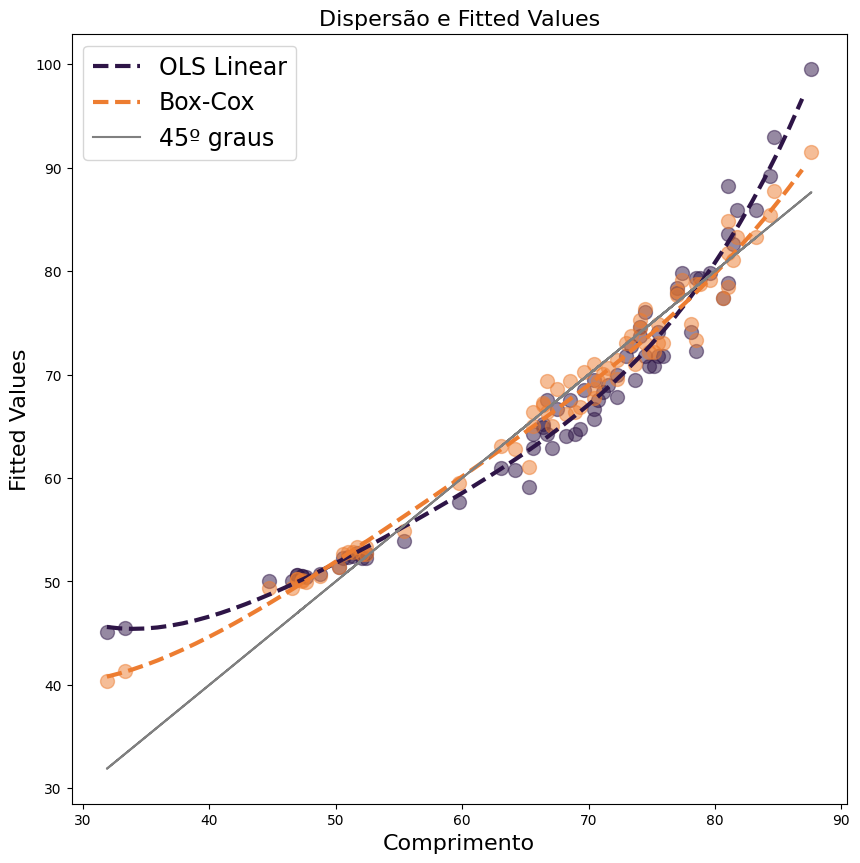

In [60]:
# In[ ]: Ajustes dos modelos
#valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

xdata = df_bebes['comprimento']
ydata_linear = df_bebes['yhat_linear']
ydata_bc = df_bebes['yhat_modelo_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Comprimento', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['OLS Linear','Box-Cox','45º graus'], fontsize=17)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [61]:
# In[ ]:
#############################################################################
#                        REGRESSÃO NÃO LINEAR MÚLTIPLA                      #
#                  EXEMPLO 05 - CARREGAMENTO DA BASE DE DADOS               #
#############################################################################

df_empresas = pd.read_csv('empresas.csv', delimiter=',')
df_empresas

#Características das variáveis do dataset
df_empresas.info()

#Estatísticas univariadas
df_empresas.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   empresa        124 non-null    object 
 1   retorno        124 non-null    float64
 2   disclosure     124 non-null    int64  
 3   endividamento  124 non-null    float64
 4   ativos         124 non-null    int64  
 5   liquidez       124 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.9+ KB


,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\3166410060.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\3166410060.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



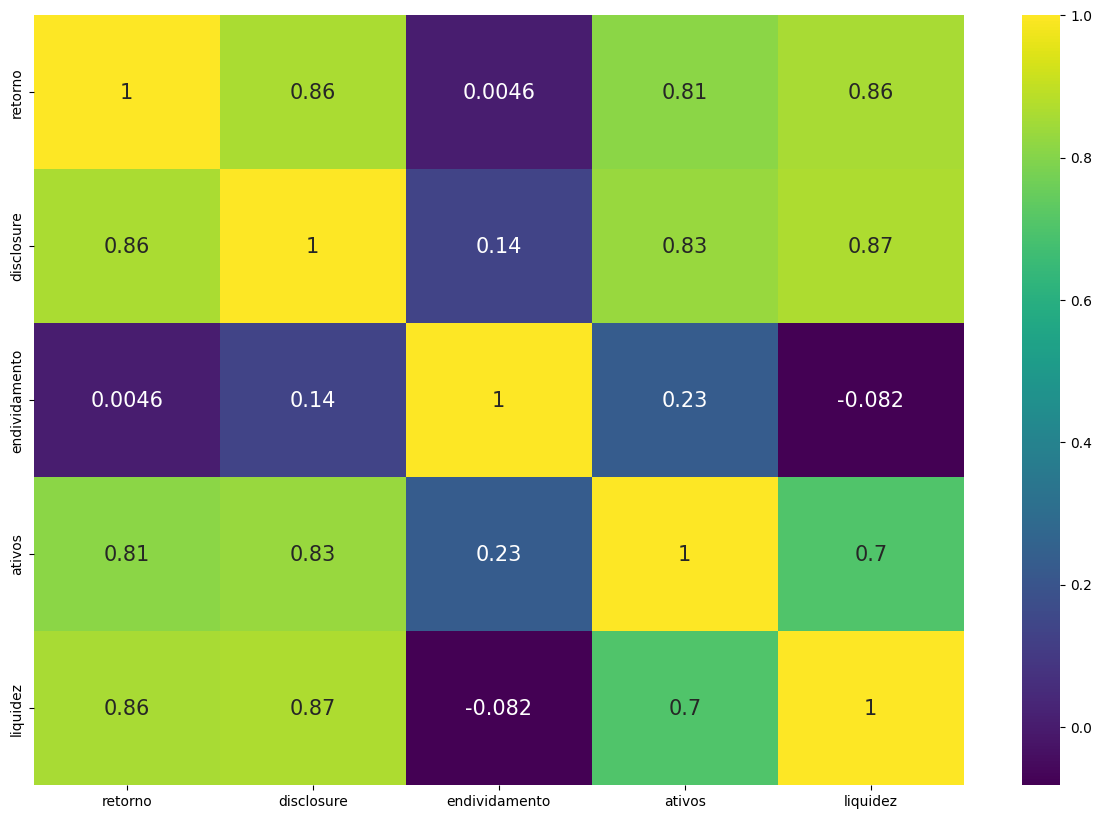

In [62]:
# In[ ]: Matriz de correlações

corr = df_empresas.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_empresas.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':15})
plt.show()


<Figure size 1500x1000 with 0 Axes>

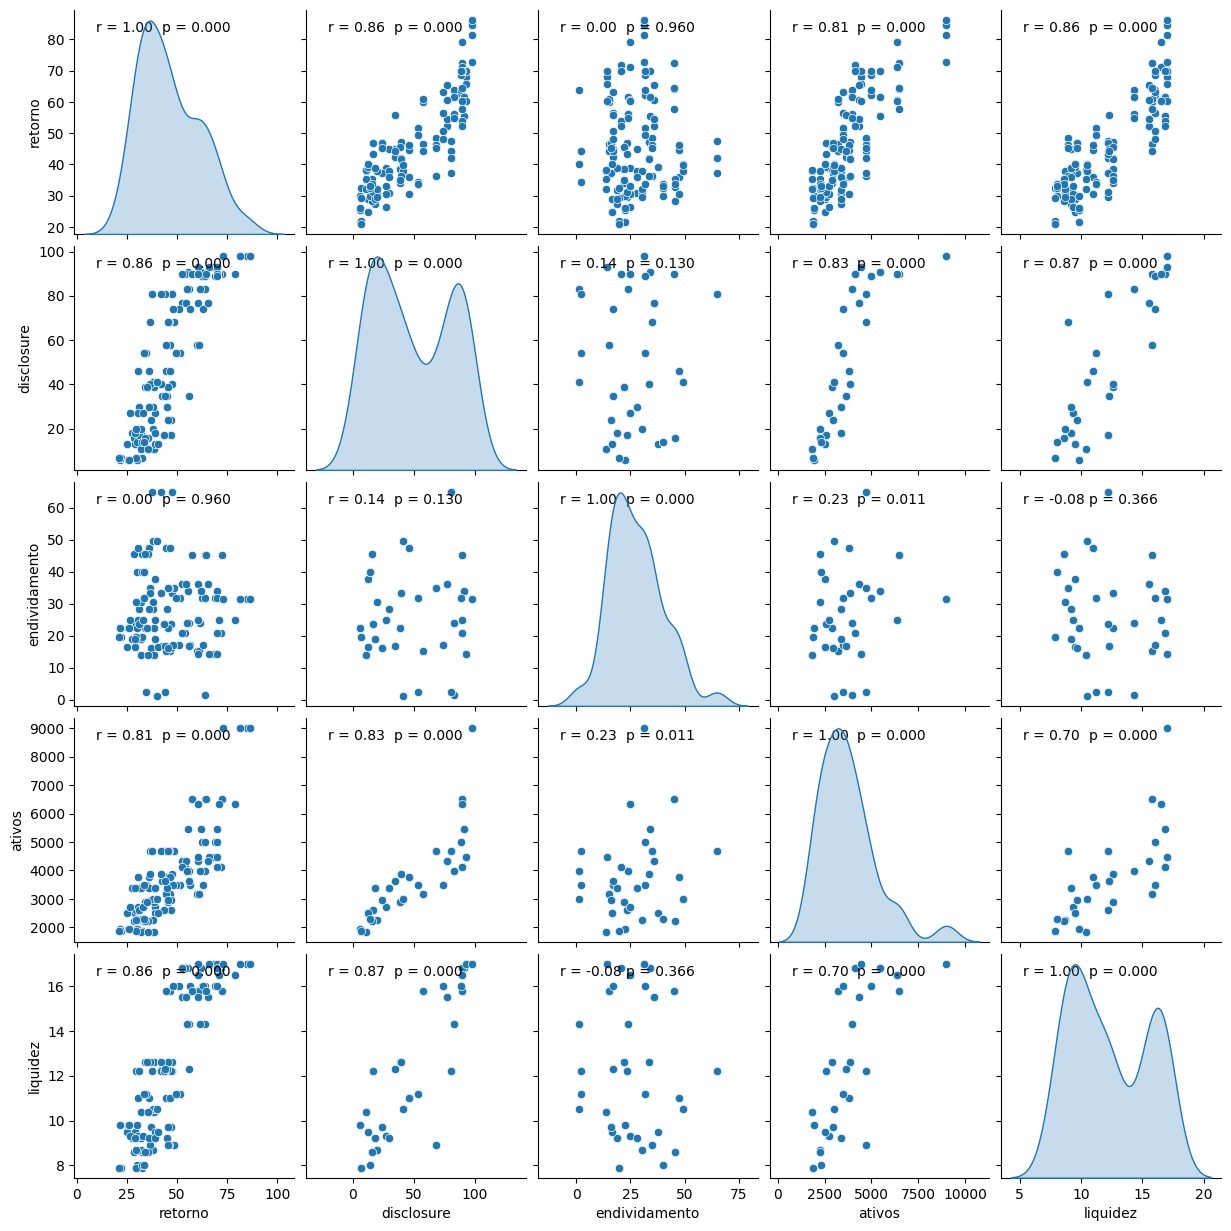

In [63]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_empresas, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [64]:
# In[ ]: Estimando a Regressão Múltipla
modelo_empresas = sm.OLS.from_formula('retorno ~ disclosure +\
                                      endividamento + ativos +\
                                          liquidez', df_empresas).fit()

# Parâmetros do modelo
modelo_empresas.summary()

#Note que o parâmetro da variável 'endividamento' não é estatisticamente
#significante ao nível de significância de 5% (nível de confiança de 95%).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.35e-45
Time:                        18:40:35   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure        0.1067      0.048      2.227      0.028       0.012       0.202
endividamento    -0.0882      0.051     -1.723      0.087      -0.190       0.013
ativos            0.0035      0.001      5.134      0.000       0.002       0.005
liquidez          1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_empresas = stepwise(modelo_empresas, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 retorno ~ disclosure + endividamento + ativos + liquidez

 Discarding atribute "endividamento" with p-value equal to 0.08749071283026526 

Estimating model...: 
 retorno ~ disclosure + ativos + liquidez

 Discarding atribute "disclosure" with p-value equal to 0.06514029954310761 

Estimating model...: 
 retorno ~ ativos + liquidez

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'endividamento', 'p-value': 0.08749071283026526}
{'atribute': 'disclosure', 'p-value': 0.06514029954310761}

 Model after stepwise process...: 
 retorno ~ ativos + liquidez 

                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     282.1
Date:                Mon

In [68]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_empresas.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9738705318499367,
 'statistics z': 2.093425694886853,
 'p-value': 0.01815558534418697}

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\815874890.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




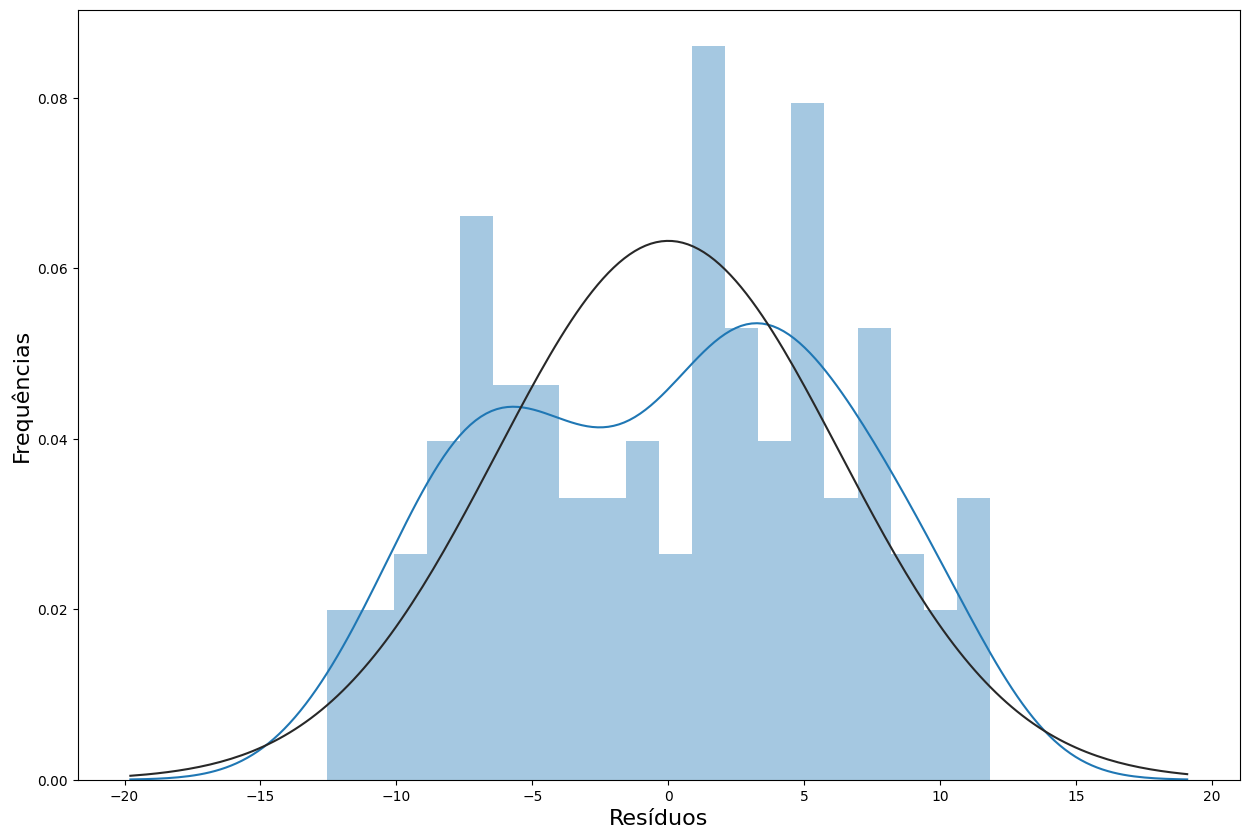

In [69]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_empresas.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [70]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#xt é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
xt, lmbda = boxcox(df_empresas['retorno'])

print("Primeiros valores: ",xt[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [3.9650019  3.83959941 3.78758231 3.81473115 4.02499897]
Lambda:  -0.022564100754067663


In [71]:
# In[ ]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo

df_empresas['bc_retorno'] = xt
df_empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno
0,Adidas,63.67,83,1.3,3967,14.3,3.965002
1,BASF,55.49,91,33.9,5450,16.8,3.839599
2,Bayer,52.42,77,36.1,4327,15.5,3.787582
3,BSH,54.00,90,20.8,4109,16.8,3.814731
4,Bosch,68.01,93,14.1,4458,17.0,4.024999
...,...,...,...,...,...,...,...
119,DuPont,39.85,41,49.5,2996,10.5,3.536070
120,ExxonMobil,44.16,35,16.8,3622,12.3,3.630464
121,FedEx,45.38,24,16.1,2972,9.7,3.655476
122,Ford Motors,45.25,68,34.8,4691,8.9,3.652844


In [72]:
# In[ ]: Estimando um novo modelo múltiplo com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_retorno ~ disclosure +\
                                endividamento + ativos +\
                                    liquidez', df_empresas).fit()

# Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_retorno   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     119.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           8.80e-41
Time:                        18:42:03   Log-Likelihood:                 74.551
No. Observations:                 124   AIC:                            -139.1
Df Residuals:                     119   BIC:                            -125.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8844      0.088     32.752      0.000       2.710       3.059
disclosure        0.0034      0.001      3.291      0.001       0.001       0.005
endividamento    -0.0013      0.001     -1.133      0.260      -0.003       0.001
ativos         4.331e-05   1.46e-05      2.967      0.004    1.44e-05    7.22e-05
liquidez          0.0359      0.009      4.202      0.000       0.019       0.053
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.267
Skew:                          -0.303   Prob(JB):                        0.195
Kurtosis:                       2.486   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# In[ ]: Aplicando o procedimento Stepwise no 'modelo_bc"

modelo_step_empresas_bc = stepwise(modelo_bc, pvalue_limit=0.05)

#Note que a variável 'disclosure' acaba voltando ao modelo
#na forma funcional não linear!

Regression type: OLS 

Estimating model...: 
 bc_retorno ~ disclosure + endividamento + ativos + liquidez

 Discarding atribute "endividamento" with p-value equal to 0.25966291656258195 

Estimating model...: 
 bc_retorno ~ disclosure + ativos + liquidez

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'endividamento', 'p-value': 0.25966291656258195}

 Model after stepwise process...: 
 bc_retorno ~ disclosure + ativos + liquidez 

                            OLS Regression Results                            
Dep. Variable:             bc_retorno   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.21e-41
Time:                        18:42:12   Log-Likelihood:                 73.887
No. Observations:                

In [74]:
# In[ ]: Verificando a normalidade dos resíduos do 'modelo_step_empresas_bc'

# Teste de Shapiro-Francia
shapiroFrancia(modelo_step_empresas_bc.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9870486145293822,
 'statistics z': 0.6866622509557848,
 'p-value': 0.24614779513016755}

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\474574674.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




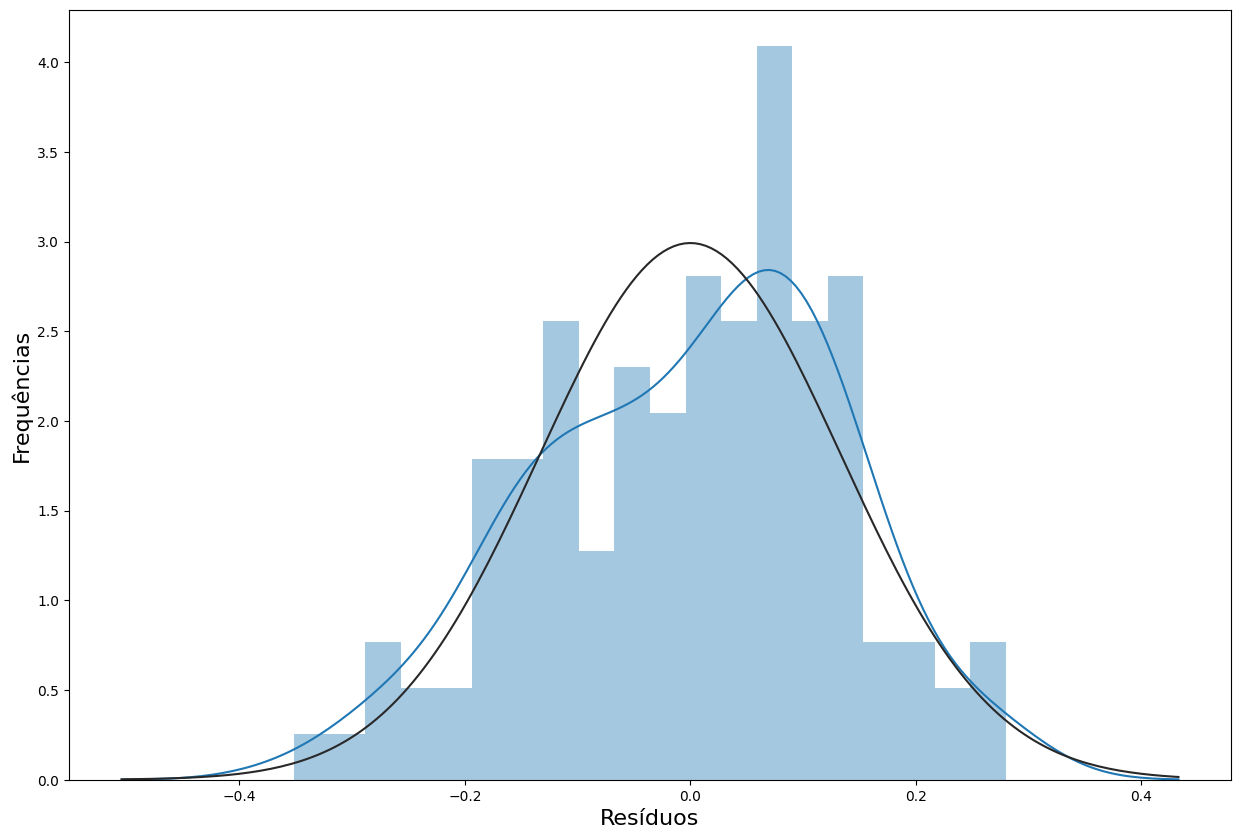

In [75]:
# In[ ]: Plotando os novos resíduos do 'modelo_step_empresas_bc'

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_empresas_bc.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [76]:
# In[ ]: Resumo dos dois modelos obtidos pelo procedimento Stepwise
#(linear e com Box-Cox)

summary_col([modelo_step_empresas, modelo_step_empresas_bc],
            model_names=["STEPWISE","STEPWISE BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,STEPWISE,STEPWISE BOX-COX
Intercept,-2.5348,2.8275***
,(2.3409),(0.0725)
R-squared,0.8234,0.7990
R-squared Adj.,0.8205,0.7940
ativos,0.0040***,0.0000***
,(0.0005),(0.0000)
disclosure,,0.0031***
,,(0.0010)
liquidez,2.7391***,0.0398***
,(0.2575),(0.0078)


In [77]:
# In[ ]: Fazendo predições com o modelo_step_empresas_bc
# Qual é o valor do retorno, em média, para disclosure igual a 50,
#liquidez igual a 14 e ativo igual a 4000, ceteris paribus?

modelo_step_empresas_bc.predict(pd.DataFrame({'const':[1],
                                              'disclosure':[50],
                                              'ativos':[4000],
                                              'liquidez':[14]}))

0    3.702016
dtype: float64

In [78]:
# In[ ]: Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted
#value de Y (retorno)

#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted value de Y (retorno)
(3.702016 * lmbda + 1) ** (1 / lmbda)


47.74261279070688

In [79]:
# In[ ]: Salvando os fitted values de 'modelo_step_empresas' e
#'modelo_step_empresas_bc'

df_empresas['yhat_step_empresas'] = modelo_step_empresas.fittedvalues
df_empresas['yhat_step_empresas_bc'] = (modelo_step_empresas_bc.fittedvalues
                                        * lmbda + 1) ** (1 / lmbda)

#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_empresas[['empresa','retorno','yhat_step_empresas','yhat_step_empresas_bc']]

,empresa,retorno,yhat_step_empresas,yhat_step_empresas_bc
0,Adidas,63.67,52.590460,54.072393
1,BASF,55.49,65.403203,66.165319
2,Bayer,52.42,57.325376,56.706216
3,BSH,54.00,60.009319,62.161048
4,Bosch,68.01,61.960912,64.337230
...,...,...,...,...
119,DuPont,39.85,38.276327,38.078000
120,ExxonMobil,44.16,45.724617,41.446025
121,FedEx,45.38,35.988530,34.685312
122,Ford Motors,45.25,40.711577,41.929545


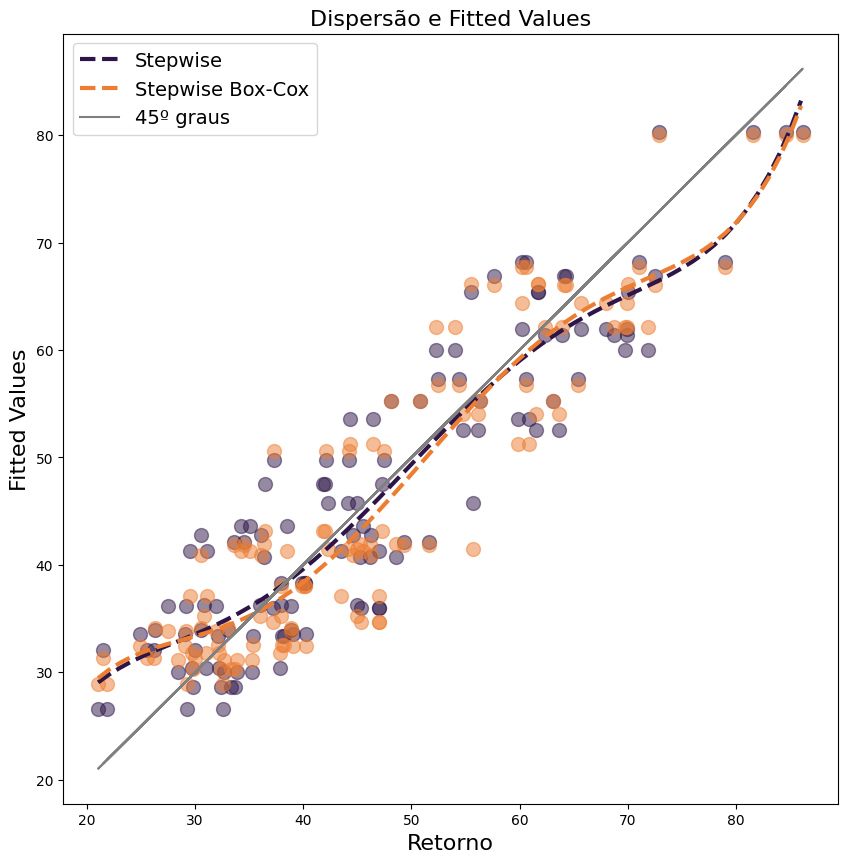

In [80]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_empresas['retorno']
ydata_linear = df_empresas['yhat_step_empresas']
ydata_bc = df_empresas['yhat_step_empresas_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Retorno', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Stepwise','Stepwise Box-Cox','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [81]:
# In[ ]:
#############################################################################
#       DIAGNÓSTICO DE MULTICOLINEARIDADE EM MODELOS DE REGRESSÃO           #
#              EXEMPLO 06 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################

df_salarios = pd.read_csv("salarios.csv", delimiter=',')
df_salarios

#Características das variáveis do dataset
df_salarios.info()

#Estatísticas univariadas
df_salarios.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          15 non-null     object 
 1   salario       15 non-null     float64
 2   rh1           15 non-null     float64
 3   econometria1  15 non-null     float64
 4   rh2           15 non-null     float64
 5   econometria2  15 non-null     float64
 6   rh3           15 non-null     float64
 7   econometria3  15 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.1+ KB


,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2032.150578,6.400000,3.200000,6.400000,3.240000,7.180000,6.400000
std,312.507361,2.221647,1.110823,2.221647,1.061367,3.169317,2.221647
min,1505.627563,3.000000,1.500000,3.000000,1.500000,1.400000,3.000000
25%,1870.515320,4.500000,2.250000,4.500000,2.250000,4.450000,4.500000
50%,2001.654297,7.000000,3.500000,7.000000,3.500000,8.000000,7.000000
75%,2219.607788,8.000000,4.000000,8.000000,4.000000,9.950000,8.000000
max,2525.340820,9.500000,4.750000,9.500000,4.750000,10.000000,9.500000


C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.69e-06
Time:                        18:45:33   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1213.7997    109.752     11.060      0.000     976.696    1450.904
rh1            102.2939     13.007      7.865      0.000      74.194     130.394
econometria1    51.1469      6.504      7.865      0.000      37.097      65.197
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                     5.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

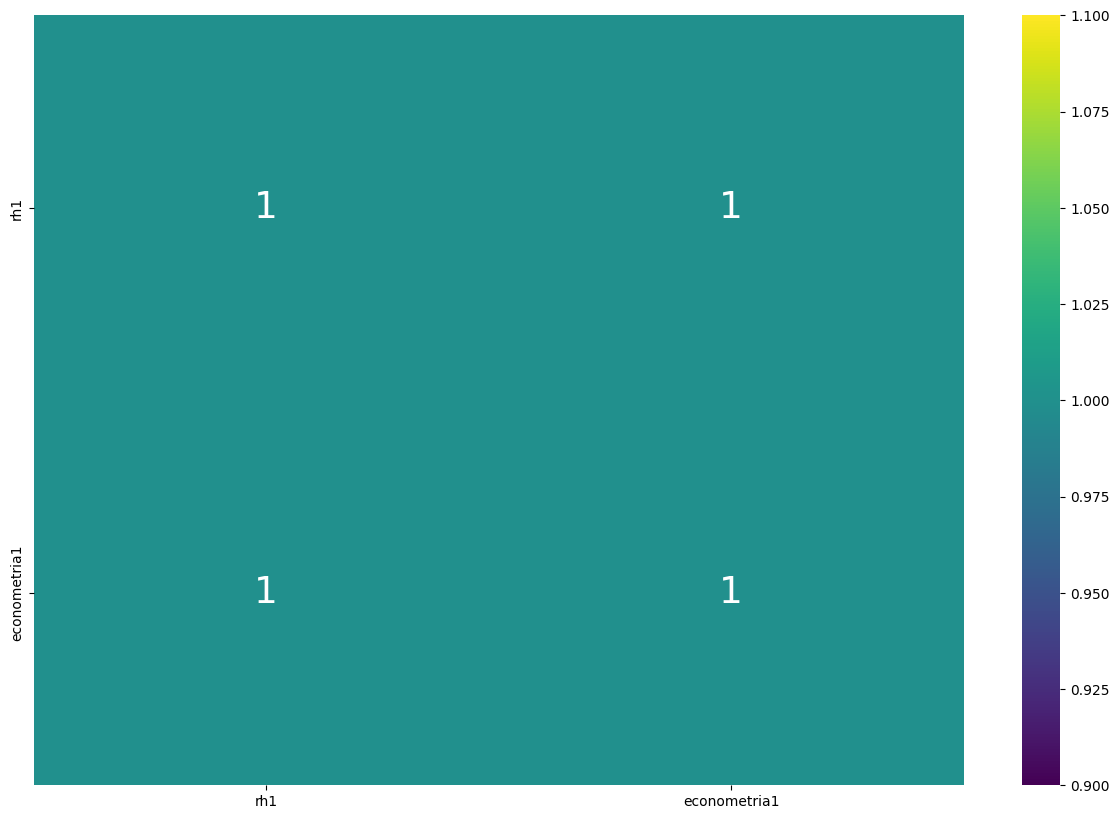

In [82]:
# In[ ]: CORRELAÇÃO PERFEITA:

corr1 = df_salarios[['rh1','econometria1']].corr()
corr1

plt.figure(figsize=(15,10))
sns.heatmap(corr1, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

# Estimando um modelo com variáveis preditoras com correlação perfeita
modelo_1 = sm.OLS.from_formula('salario ~ rh1 + econometria1',
                               df_salarios).fit()

# Parâmetros do modelo
modelo_1.summary()

C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



,VIF,Tolerance
const,20.465195,0.048863
rh3,1.075576,0.929735
econometria3,1.075576,0.929735


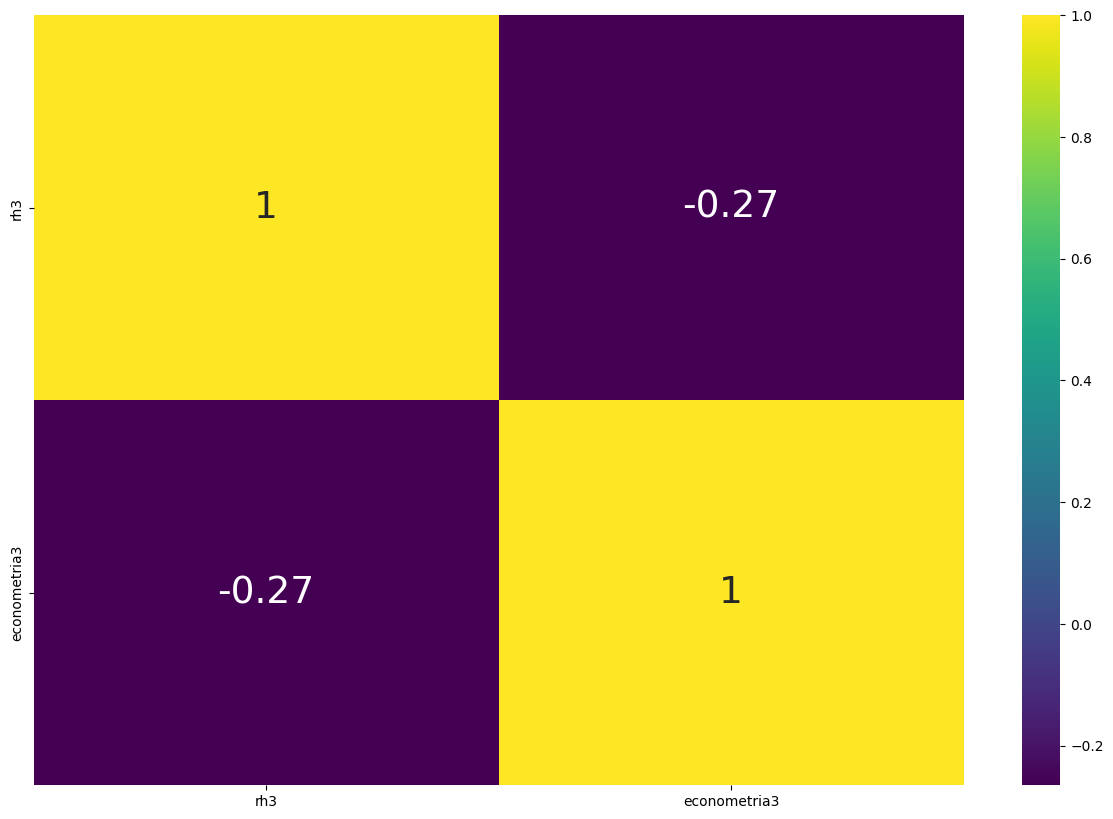

In [83]:
# In[ ]: CORRELAÇÃO BAIXA:

corr3 = df_salarios[['rh3','econometria3']].corr()
corr3

plt.figure(figsize=(15,10))
sns.heatmap(corr3, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

# Estimando um modelo com variáveis preditoras com correlação baixa
modelo_3 = sm.OLS.from_formula('salario ~ rh3 + econometria3',
                               df_salarios).fit()

# Parâmetros do modelo
modelo_3.summary()

# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_salarios[['rh3','econometria3']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



,VIF,Tolerance
const,13.049699,0.076630
rh2,82.061458,0.012186
econometria2,82.061458,0.012186


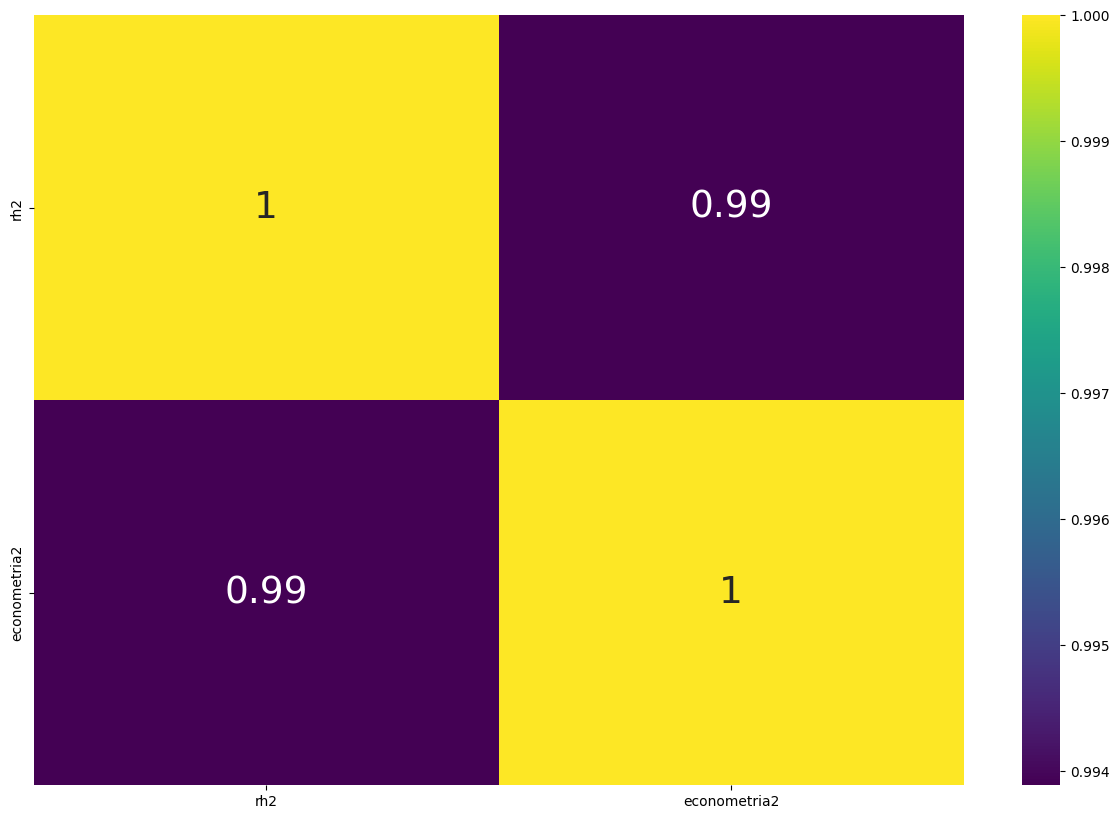

In [84]:
# In[ ]: CORRELAÇÃO MUITO ALTA, PORÉM NÃO PERFEITA:

corr2 = df_salarios[['rh2','econometria2']].corr()
corr2

plt.figure(figsize=(15,10))
sns.heatmap(corr2, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

# Estimando um modelo com variáveis preditoras com correlação quase perfeita
modelo_2 = sm.OLS.from_formula('salario ~ rh2 + econometria2',
                               df_salarios).fit()

# Parâmetros do modelo
modelo_2.summary()

# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

X = df_salarios[['rh2','econometria2']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

In [85]:
# In[ ]:
#############################################################################
#      DIAGNÓSTICO DE HETEROCEDASTICIDADE EM MODELOS DE REGRESSÃO           #
#              EXEMPLO 07 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################
    
df_saeb_rend = pd.read_csv("saeb_rend.csv", delimiter=',')
df_saeb_rend

#Características das variáveis do dataset
df_saeb_rend.info()

#Estatísticas univariadas
df_saeb_rend.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43607 entries, 0 to 43606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uf          43607 non-null  object 
 1   municipio   43607 non-null  object 
 2   codigo      43607 non-null  int64  
 3   escola      43607 non-null  object 
 4   rede        43607 non-null  object 
 5   saeb        25538 non-null  float64
 6   rendimento  37324 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ MB


,codigo,saeb,rendimento
count,4.360700e+04,25538.000000,37324.000000
mean,3.112734e+07,5.047511,0.856967
std,9.956731e+06,0.753718,0.110447
min,1.100026e+07,2.053000,0.247282
25%,2.316996e+07,4.554542,0.791561
50%,3.108142e+07,5.069500,0.878536
75%,3.590717e+07,5.551458,0.944761
max,5.306821e+07,8.588000,1.000000


In [86]:
# In[ ]: Tabela de frequências absolutas das variáveis 'uf' e rede'

df_saeb_rend['uf'].value_counts()
df_saeb_rend['rede'].value_counts()

Municipal    22610
Estadual     20959
Federal         38
Name: rede, dtype: int64

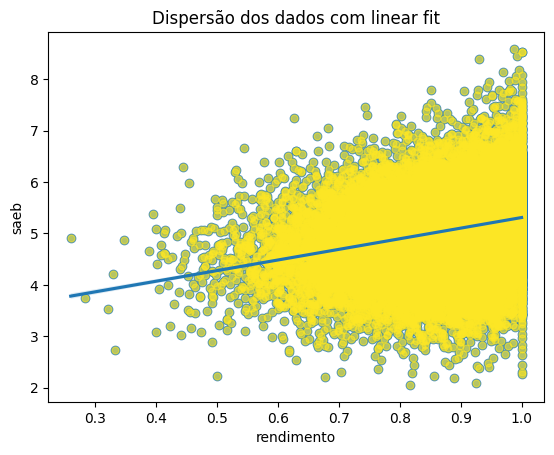

In [87]:
# In[ ]: Plotando 'saeb' em função de 'rendimento', com linear fit

x = df_saeb_rend['rendimento']
y = df_saeb_rend['saeb']
plt.plot(x, y, 'o', color='#FDE725FF', markersize=5, alpha=0.6)
sns.regplot(x="rendimento", y="saeb", data=df_saeb_rend)
plt.title('Dispersão dos dados com linear fit')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()


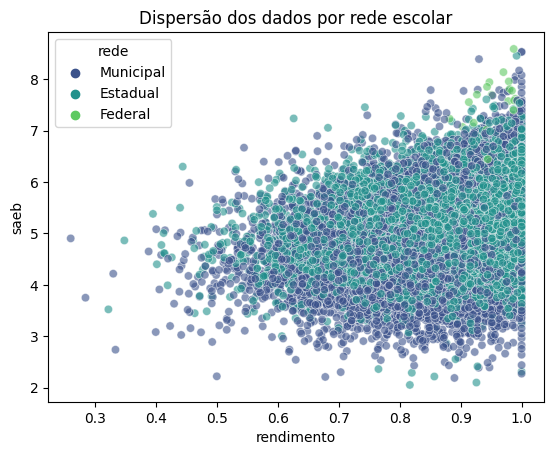

In [88]:
# In[ ]: Plotando 'saeb' em função de 'rendimento',
#com destaque para 'rede' escolar

sns.scatterplot(x="rendimento", y="saeb", data=df_saeb_rend,
                hue="rede", alpha=0.6, palette = "viridis")
plt.title('Dispersão dos dados por rede escolar')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

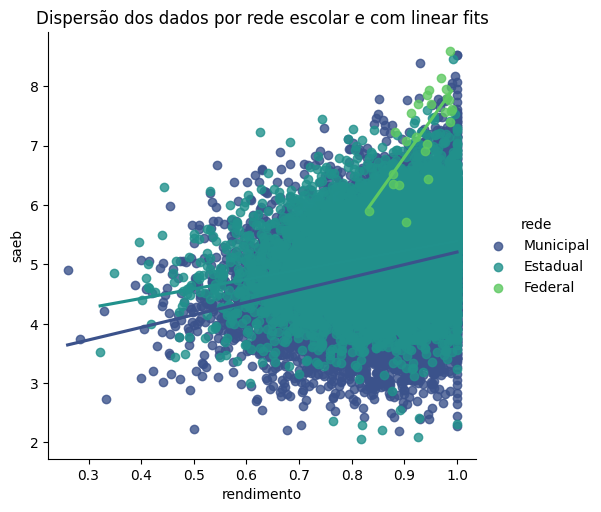

In [89]:
# In[ ]: Plotando 'saeb' em função de 'rendimento',
#com destaque para 'rede' escolar e linear fits

sns.lmplot(x="rendimento", y="saeb", data=df_saeb_rend,
           hue="rede", ci=None, palette="viridis")
plt.title('Dispersão dos dados por rede escolar e com linear fits')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

In [90]:
# In[ ]: Estimação do modelo de regressão e diagnóstico de heterocedasticidade

# Estimando o modelo
modelo_saeb = sm.OLS.from_formula('saeb ~ rendimento', df_saeb_rend).fit()

# Parâmetros do modelo
modelo_saeb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2126.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:46:53   Log-Likelihood:                -27984.
No. Observations:               25530   AIC:                         5.597e+04
Df Residuals:                   25528   BIC:                         5.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2425      0.039     82.277      0.000       3.165       3.320
rendimento     2.0665      0.045     46.111      0.000       1.979       2.154
==============================================================================
Omnibus:                      152.496   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.269
Skew:                          -0.091   Prob(JB):                     1.97e-44
Kurtosis:                       3.395   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade

# Criação da função 'breusch_pagan_test'

from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

In [92]:
# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_saeb)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 16.720700325953544
p-value: 4.5651903149382985e-05


(16.720700325953544, 4.5651903149382985e-05)

In [93]:
# In[ ]: Dummizando a variável 'uf'

df_saeb_rend_dummies = pd.get_dummies(df_saeb_rend, columns=['uf'],
                                      drop_first=True)

df_saeb_rend_dummies.head(10)

,municipio,codigo,escola,rede,saeb,rendimento,uf_AL,uf_AM,uf_AP,uf_BA,...,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RR,uf_RS,uf_SC,uf_SE,uf_SP,uf_TO
0,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Alta Floresta D'Oeste,11025077,EMEIEF MARIA DE SOUZA PEGO,Municipal,5.152833,0.897852,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Alta Floresta D'Oeste,11025115,EMEIEF MARTIM AFONSO DE SOUZA,Municipal,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Alta Floresta D'Oeste,11025310,EMEIEF PEDRO ALEIXO,Municipal,5.608333,0.599606,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,Alta Floresta D'Oeste,11025352,EMEIEF POTY,Municipal,4.617000,0.799311,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Alta Floresta D'Oeste,11025620,EEEF TANCREDO DE ALMEIDA NEVES,Estadual,NaN,0.916305,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
# In[ ]: Estimação do modelo de regressão múltipla com n-1 dummies

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_saeb_rend_dummies.drop(columns=['municipio',
                                                        'codigo',
                                                        'escola',
                                                        'rede',
                                                        'saeb']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "saeb ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

modelo_saeb_dummies_uf = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_saeb_rend_dummies).fit()

#Parâmetros do modelo
modelo_saeb_dummies_uf.summary()

Fórmula utilizada:  saeb ~ rendimento + uf_AL + uf_AM + uf_AP + uf_BA + uf_CE + uf_DF + uf_ES + uf_GO + uf_MA + uf_MG + uf_MS + uf_MT + uf_PA + uf_PB + uf_PE + uf_PI + uf_PR + uf_RJ + uf_RN + uf_RO + uf_RR + uf_RS + uf_SC + uf_SE + uf_SP + uf_TO


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     497.5
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:47:34   Log-Likelihood:                -23604.
No. Observations:               25530   AIC:                         4.726e+04
Df Residuals:                   25502   BIC:                         4.749e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7566      0.071     53.118      0.000       3.618       3.895
rendimento     1.2444      0.044     28.057      0.000       1.157       1.331
uf_AL         -0.1680      0.065     -2.589      0.010      -0.295      -0.041
uf_AM         -0.2480      0.063     -3.949      0.000      -0.371      -0.125
uf_AP         -0.5356      0.091     -5.900      0.000      -0.714      -0.358
uf_BA         -0.2451      0.060     -4.106      0.000      -0.362      -0.128
uf_CE          0.3591      0.059      6.072      0.000       0.243       0.475
uf_DF          0.4426      0.082      5.422      0.000       0.283       0.603
uf_ES          0.5843      0.064      9.197      0.000       0.460       0.709
uf_GO          0.4936      0.061      8.103      0.000       0.374       0.613
uf_MA         -0.6703      0.060    -11.194      0.000      -0.788      -0.553
uf_MG          0.3983      0.059      6.774      0.000       0.283       0.514
uf_MS          0.5386      0.067      8.087      0.000       0.408       0.669
uf_MT         -0.0836      0.064     -1.305      0.192      -0.209       0.042
uf_PA         -0.4627      0.060     -7.654      0.000      -0.581      -0.344
uf_PB         -0.0913      0.063     -1.438      0.151      -0.216       0.033
uf_PE         -0.0279      0.060     -0.461      0.645      -0.146       0.091
uf_PI         -0.1084      0.062     -1.759      0.079      -0.229       0.012
uf_PR          0.6130      0.061     10.112      0.000       0.494       0.732
uf_RJ          0.3945      0.060      6.531      0.000       0.276       0.513
uf_RN         -0.0996      0.067     -1.483      0.138      -0.231       0.032
uf_RO          0.3881      0.068      5.738      0.000       0.256       0.521
uf_RR         -0.2887      0.105     -2.742      0.006      -0.495      -0.082
uf_RS          0.7146      0.060     11.993      0.000       0.598       0.831
uf_SC          0.6930      0.060     11.483      0.000       0.575       0.811
uf_SE         -0.0072      0.067     -0.108      0.914      -0.138       0.124
uf_SP          0.4371      0.059      7.448      0.000       0.322       0.552
uf_TO          0.1189      0.067      1.782      0.075      -0.012       0.250
==============================================================================
Omnibus:                      575.254   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.751
Skew:                           0.147   Prob(JB):                    1.58e-244
Kurtosis:                       3.984   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# In[ ]: Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
#no 'modelo_saeb_dummies_uf'

breusch_pagan_test(modelo_saeb_dummies_uf)

chisq: 1.0756241898384158
p-value: 0.44930469428880987


(1.0756241898384158, 0.44930469428880987)

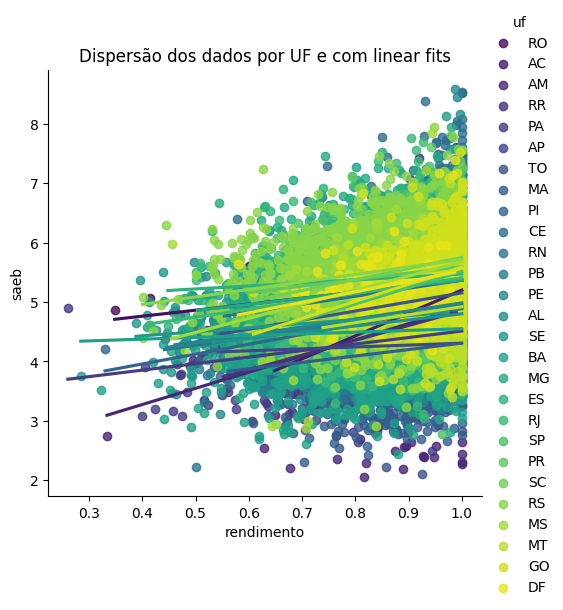

In [96]:
# In[ ]: Plotando 'saeb' em função de 'rendimento',
#com destaque para UFs e linear fits

sns.lmplot(x="rendimento", y="saeb", data=df_saeb_rend,
           hue="uf", ci=None, palette="viridis")
plt.title('Dispersão dos dados por UF e com linear fits')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

In [97]:
# In[ ]:
#############################################################################
#               REGRESSÃO NÃO LINEAR MÚLTIPLA COM DUMMIES                   #
#               EXEMPLO 08 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

df_planosaude = pd.read_csv("planosaude.csv", delimiter=',')
df_planosaude

#Características das variáveis do dataset
df_planosaude.info()

#Estatísticas univariadas
df_planosaude.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    int64  
 1   despmed  200 non-null    float64
 2   idade    200 non-null    int64  
 3   dcron    200 non-null    int64  
 4   renda    200 non-null    float64
 5   plano    200 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


,id,despmed,idade,dcron,renda
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,161.183400,50.010000,2.705000,50.022000
std,57.879185,42.447084,12.547794,1.670908,12.626538
min,1.000000,88.730000,32.000000,0.000000,31.600000
25%,50.750000,126.140000,38.000000,1.000000,38.000000
50%,100.500000,155.000000,49.000000,2.000000,48.799999
75%,150.250000,197.622500,63.000000,4.000000,63.200001
max,200.000000,269.200000,68.000000,5.000000,68.000000


In [98]:
# In[ ]: Transformação da variável 'plano' para o tipo categórico

df_planosaude['plano'] = df_planosaude['plano'].astype('category')
df_planosaude['plano']

0         bronze
1         bronze
2         bronze
3         bronze
4         bronze
         ...    
195    esmeralda
196       bronze
197    esmeralda
198    esmeralda
199    esmeralda
Name: plano, Length: 200, dtype: category
Categories (3, object): ['bronze', 'esmeralda', 'ouro']

In [99]:
# In[ ]: Tabela de frequências absolutas da variável 'plano'

df_planosaude['plano'].value_counts()

bronze       72
esmeralda    66
ouro         62
Name: plano, dtype: int64

<Figure size 1500x1000 with 0 Axes>

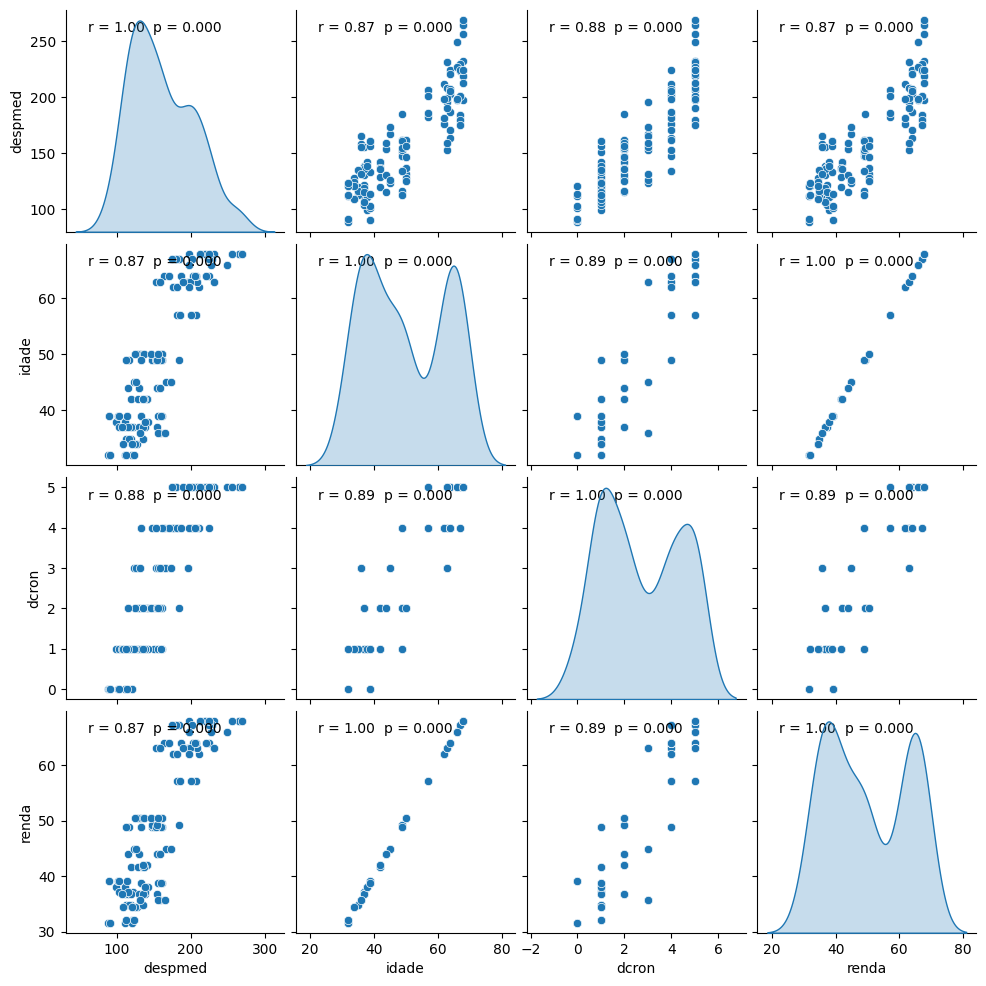

In [100]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_planosaude.loc[:,"despmed":"renda"], diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [101]:
# In[ ]: Dummizando a variável 'plano'

df_planosaude_dummies = pd.get_dummies(df_planosaude, columns=['plano'],
                                      drop_first=True)

df_planosaude_dummies.head(10)

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro
0,1,206.84,57,5,57.200001,0,0
1,2,184.19,67,4,67.199997,0,0
2,3,175.68,62,4,62.000000,0,0
3,4,180.04,67,5,67.199997,0,0
4,5,218.86,68,5,68.000000,0,0
5,6,208.11,63,5,63.200001,0,0
6,7,220.94,64,5,64.000000,0,0
7,8,249.35,66,5,66.000000,0,0
8,9,264.93,68,5,68.000000,0,0
9,10,196.22,63,3,63.200001,0,0


In [102]:
# In[ ]: Estimação do modelo de regressão múltipla com n-1 dummies

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_planosaude_dummies.drop(columns=['id',
                                                         'despmed']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "despmed ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

modelo_planosaude = sm.OLS.from_formula(formula_dummies_modelo,
                                        df_planosaude_dummies).fit()

#Parâmetros do modelo
modelo_planosaude.summary()

Fórmula utilizada:  despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                despmed   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     262.3
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.88e-84
Time:                        18:48:46   Log-Likelihood:                -828.04
No. Observations:                 200   AIC:                             1668.
Df Residuals:                     194   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.8596     12.744     11.681      0.000     123.725     173.994
idade               8.9226      5.549      1.608      0.109      -2.021      19.866
dcron               6.7232      1.600      4.201      0.000       3.567       9.879
renda              -8.4425      5.464     -1.545      0.124     -19.219       2.334
plano_esmeralda   -35.0189      4.685     -7.474      0.000     -44.259     -25.779
plano_ouro        -58.7653      6.075     -9.673      0.000     -70.747     -46.783
==============================================================================
Omnibus:                       25.070   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.329
Skew:                           0.622   Prob(JB):                     3.20e-11
Kurtosis:                       5.062   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_planosaude = stepwise(modelo_planosaude, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.12394651280125796 

Estimating model...: 
 despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.11501748716135415 

Estimating model...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.12394651280125796}
{'atribute': 'idade', 'p-value': 0.11501748716135415}

 Model after stepwise process...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:                despmed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                   

In [104]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_planosaude.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.942916765126418,
 'statistics z': 4.609587272596207,
 'p-value': 2.0173456996167577e-06}

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\875474525.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




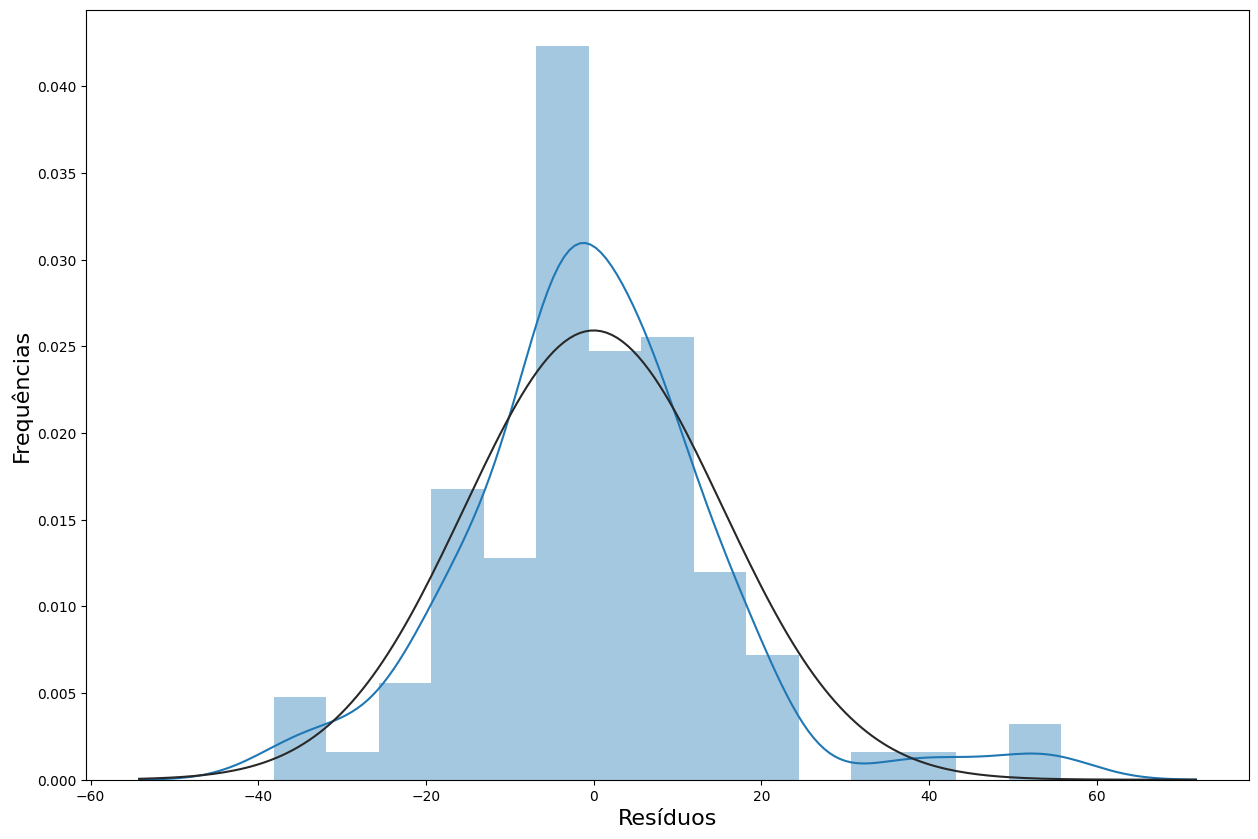

In [105]:
# In[ ]: Plotando os resíduos do 'modelo_step_planosaude',
#com curva normal teórica

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_planosaude.resid, fit=norm, kde=True, bins=15)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

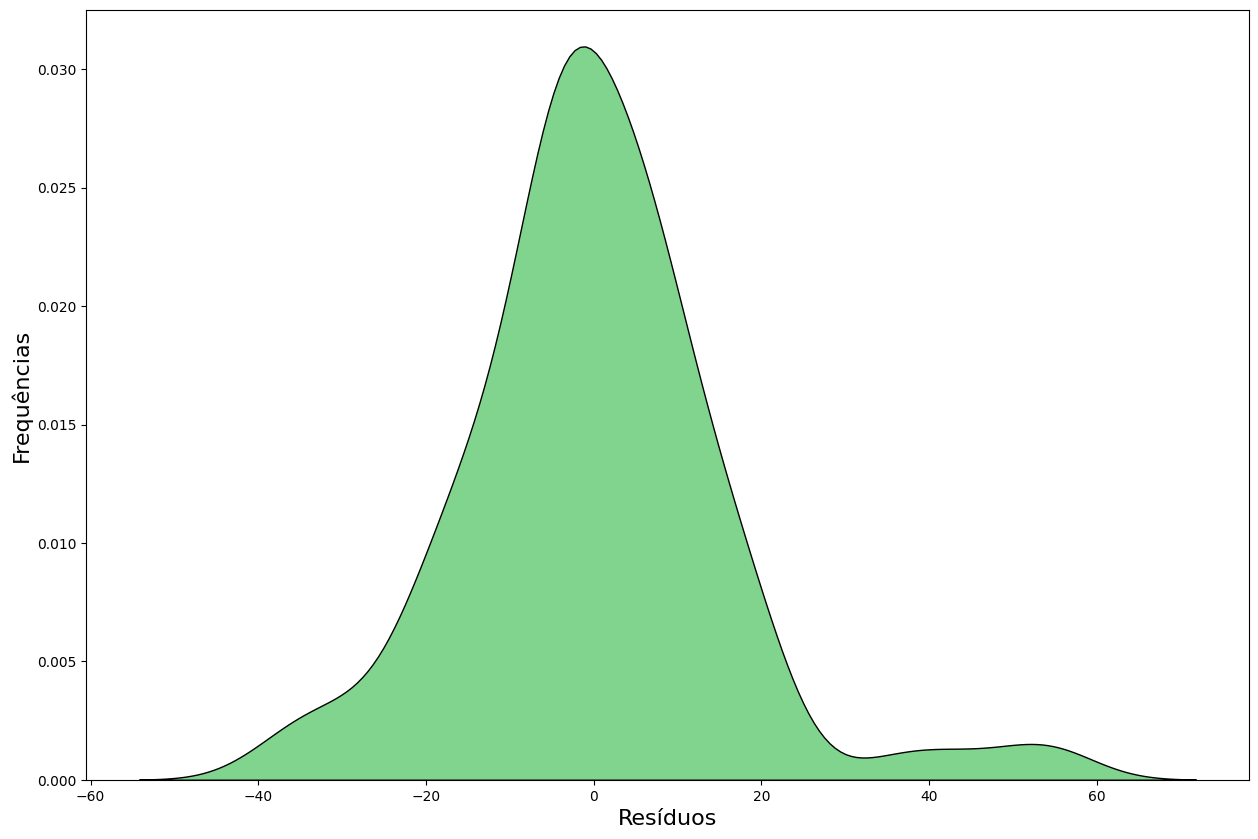

In [106]:
# In[ ]: Kernel density estimation (KDE) - forma não-paramétrica para estimar
#a função densidade de probabilidade de uma variável aleatória

plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_step_planosaude.resid, multiple="stack",
            color='#55C667FF')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [107]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade

# Criação da função 'breusch_pagan_test'

#from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

In [108]:
# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_planosaude)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 60.801824942353704
p-value: 6.412586303736341e-15


(60.801824942353704, 6.412586303736341e-15)

In [109]:
# In[ ]: Adicionando fitted values e resíduos do 'modelo_step_planosaude'
#no dataset 'df_planosaude_dummies'

df_planosaude_dummies['fitted_step'] = modelo_step_planosaude.fittedvalues
df_planosaude_dummies['residuos_step'] = modelo_step_planosaude.resid
df_planosaude_dummies


,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515
...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648


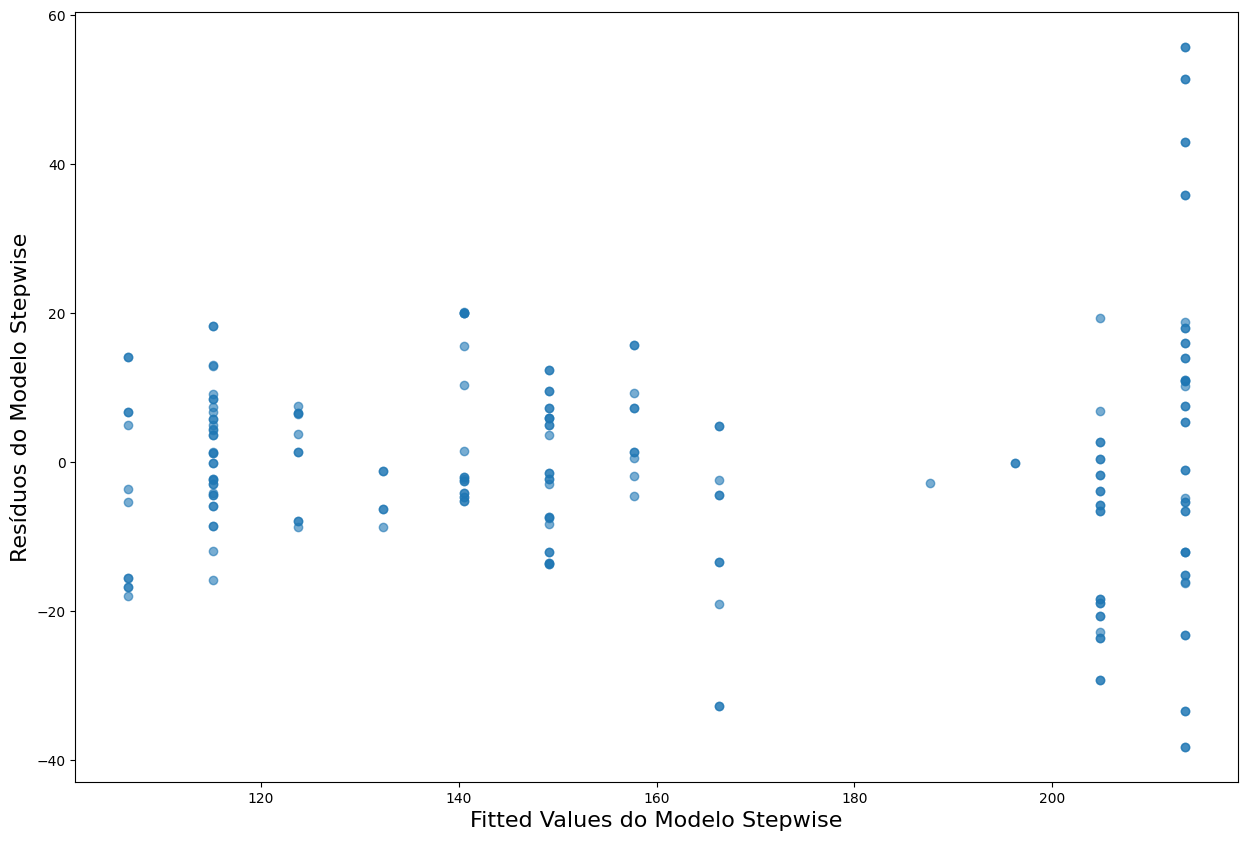

In [110]:
# In[ ]: Gráfico que relaciona resíduos e fitted values
#do 'modelo_step_planosaude'

xdata = df_planosaude_dummies['fitted_step']
ydata = df_planosaude_dummies['residuos_step']

plt.figure(figsize=(15,10))
plt.scatter(xdata, ydata, alpha=0.6)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=16)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=16)
plt.show()

In [111]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df_planosaude_dummies['despmed'])

print("Primeiros valores: ",x[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [3.718813   3.66464869 3.64229506 3.65389877 3.74486701]
Lambda:  -0.14436741694478952


In [112]:
# In[ ]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo

df_planosaude_dummies['bc_despmed'] = x
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step,bc_despmed
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485,3.718813
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144,3.664649
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144,3.642295
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485,3.653899
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515,3.744867
...,...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307,3.594710
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856,3.715463
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034,3.510008
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648,3.593832


In [113]:
# In[ ]: Estimando um novo modelo com todas as variáveis e a
#variável dependente transformada
modelo_bc_planosaude = sm.OLS.from_formula('bc_despmed ~ idade + dcron +\
                                           renda + plano_esmeralda +\
                                               plano_ouro',
                                               df_planosaude_dummies).fit()

#Parâmetros do modelo
modelo_bc_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_despmed   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.5
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.80e-92
Time:                        18:50:21   Log-Likelihood:                 355.33
No. Observations:                 200   AIC:                            -698.7
Df Residuals:                     194   BIC:                            -678.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5507      0.034    103.431      0.000       3.483       3.618
idade               0.0146      0.015      0.980      0.328      -0.015       0.044
dcron               0.0231      0.004      5.360      0.000       0.015       0.032
renda              -0.0136      0.015     -0.924      0.357      -0.043       0.015
plano_esmeralda    -0.0820      0.013     -6.494      0.000      -0.107      -0.057
plano_ouro         -0.1791      0.016    -10.944      0.000      -0.211      -0.147
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.871
Skew:                          -0.246   Prob(JB):                        0.238
Kurtosis:                       3.319   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# In[ ]: Procedimento Stepwise

modelo_step_bc_planosaude = stepwise(modelo_bc_planosaude, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.35652506193901945 

Estimating model...: 
 bc_despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.16481169113199573 

Estimating model...: 
 bc_despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.35652506193901945}
{'atribute': 'idade', 'p-value': 0.16481169113199573}

 Model after stepwise process...: 
 bc_despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:             bc_despmed   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:       

In [115]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

#Teste de Shapiro-Francia
shapiroFrancia(modelo_step_bc_planosaude.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9868895949417092,
 'statistics z': 1.5678174790533672,
 'p-value': 0.05846186724841663}

C:\Users\alexr\AppData\Local\Temp\ipykernel_22180\2352624109.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




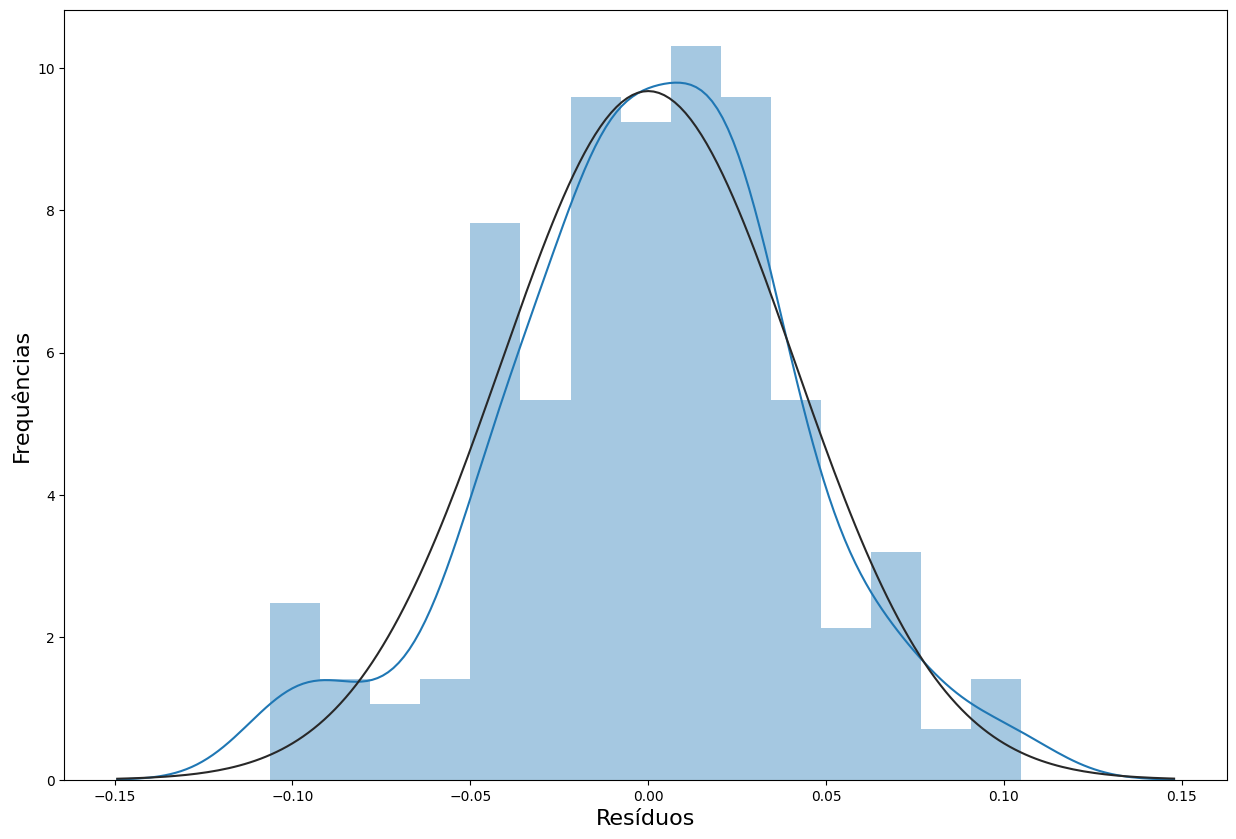

In [116]:
# In[ ]: Plotando os novos resíduos do 'modelo_step_bc_planosaude'
#com curva normal teórica

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_bc_planosaude.resid, fit=norm, kde=True, bins=15)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

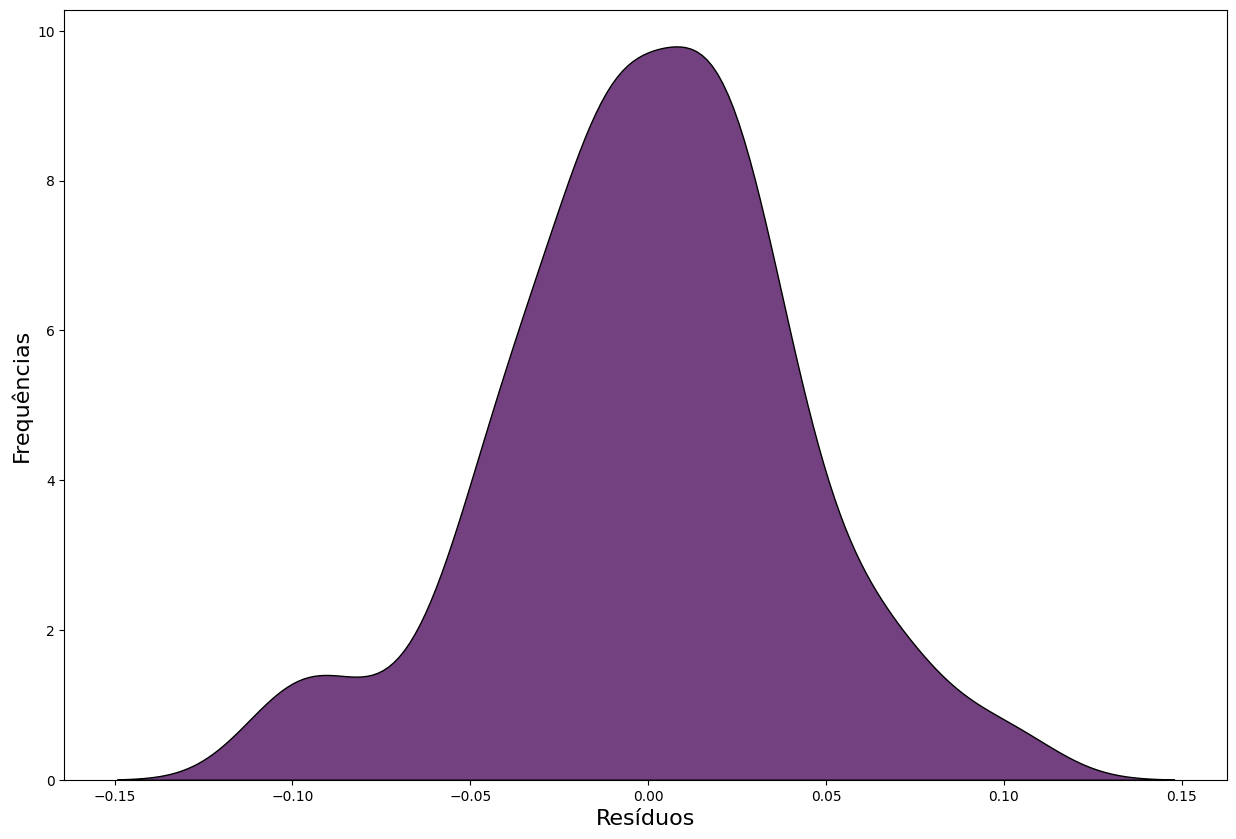

In [117]:
# In[ ]: Kernel density estimation (KDE)

plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_step_bc_planosaude.resid, multiple="stack",
            color='#440154FF')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [118]:
# In[ ]: Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
#no 'modelo_step_bc_planosaude'

breusch_pagan_test(modelo_step_bc_planosaude)

chisq: 1.012628111224258
p-value: 0.4778875003744552


(1.012628111224258, 0.4778875003744552)

In [119]:
# In[ ]: Adicionando fitted values e resíduos do 'modelo_step_bc_planosaude'
#no dataset 'df_planosaude_dummies'

df_planosaude_dummies['fitted_step_bc'] = modelo_step_bc_planosaude.fittedvalues
df_planosaude_dummies['residuos_step_bc'] = modelo_step_bc_planosaude.resid
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step,bc_despmed,fitted_step_bc,residuos_step_bc
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485,3.718813,3.733710,-0.014897
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144,3.664649,3.706620,-0.041972
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144,3.642295,3.706620,-0.064325
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485,3.653899,3.733710,-0.079812
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515,3.744867,3.733710,0.011157
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307,3.594710,3.589191,0.005519
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856,3.715463,3.706620,0.008843
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034,3.510008,3.616281,-0.106274
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648,3.593832,3.562101,0.031730


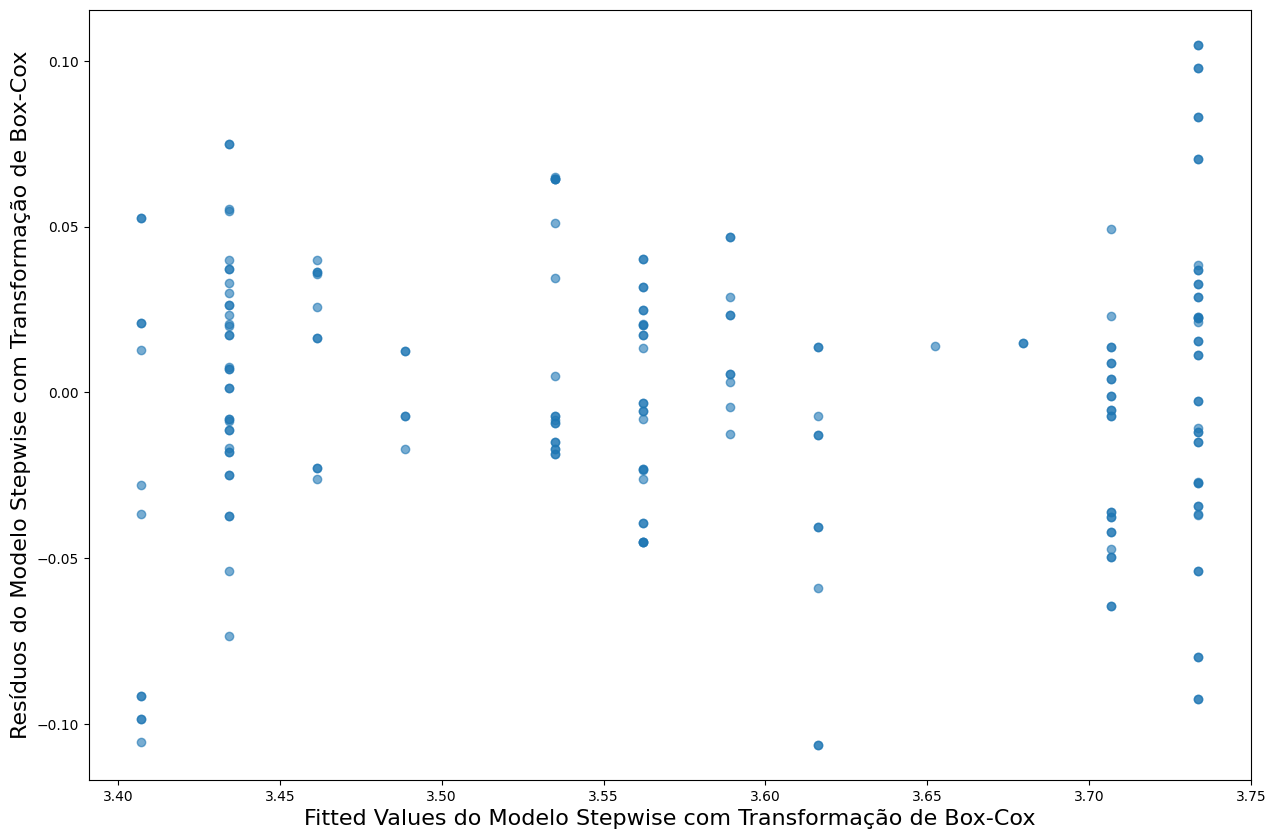

In [120]:
# In[ ]: Gráfico que relaciona resíduos e fitted values
#do 'modelo_step_bc_planosaude'

xdata = df_planosaude_dummies['fitted_step_bc']
ydata = df_planosaude_dummies['residuos_step_bc']

plt.figure(figsize=(15,10))
plt.scatter(xdata, ydata, alpha=0.6)
plt.xlabel('Fitted Values do Modelo Stepwise com Transformação de Box-Cox',
           fontsize=16)
plt.ylabel('Resíduos do Modelo Stepwise com Transformação de Box-Cox',
           fontsize=16)
plt.show()

In [121]:
################################### FIM ######################################